In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/EV_Charging_Grid_Optimization_Categorical.csv")

In [ ]:
df.describe()

station_id  num_chargers  voltage_level  current_flow  power_consumed  \
count  1000.000000   1000.000000    1000.000000   1000.000000     1000.000000   
mean      9.746000      5.452000     234.986498     54.481637       12.794471   
std       5.651497      2.266458       8.670470     25.628707        6.025514   
min       1.000000      2.000000     220.000349     10.002765        2.275144   
25%       5.000000      4.000000     227.414684     32.558729        7.647994   
50%       9.000000      5.000000     235.058603     55.000776       12.886454   
75%      15.000000      7.000000     242.524366     75.792191       17.761711   
max      19.000000      9.000000     249.986731     99.797445       24.674486   

        power_loss  voltage_fluctuation        ev_id  battery_capacity  \
count  1000.000000          1000.000000  1000.000000       1000.000000   
mean      2.512421             5.234571  3017.910000         61.277468   
std       1.417046             2.745746  1147.261373         23.224867   
min       0.101112             0.537225  1002.000000         20.144963   
25%       1.298002             2.839050  2044.000000         41.565258   
50%       2.428011             5.249262  3016.500000         62.242426   
75%       3.734997             7.675131  4048.500000         81.729842   
max       4.994085             9.994876  4981.000000         99.979302   

       charging_time  charging_power  charging_cost  predicted_power_demand  \
count    1000.000000     1000.000000    1000.000000             1000.000000   
mean       94.940296       26.489751       6.359005               12.784137   
std        48.974267       13.491834       4.952717                6.049461   
min        10.230439        3.008704       0.140320                2.195881   
25%        53.529691       15.177726       2.156213                7.634471   
50%        95.991859       26.286182       5.077343               12.808172   
75%       137.977870       37.607381       9.437712               17.743314   
max       179.950298       49.976328      20.558904               24.634337   

       optimized_charging_power  grid_stability_score  
count               1000.000000           1000.000000  
mean                  12.793828              0.497741  
std                    6.076629              0.284215  
min                    2.028180              0.000119  
25%                    7.748674              0.254888  
50%                   12.860950              0.504494  
75%                   17.800196              0.735660  
max                   25.917816              0.999009

In [ ]:
df.dtypes

timestamp                       object
station_id                       int64
location                        object
charging_type                   object
num_chargers                     int64
voltage_level                  float64
current_flow                   float64
power_consumed                 float64
power_loss                     float64
voltage_fluctuation            float64
ev_id                            int64
battery_capacity               float64
charging_time                  float64
charging_power                 float64
charging_cost                  float64
predicted_power_demand         float64
optimized_charging_power       float64
grid_stability_score           float64
reduced_power_loss_category     object
voltage_stability_category      object
dtype: object

In [ ]:
df.head(15)

timestamp  station_id  location charging_type  num_chargers  \
0   2024-01-01 00:00:00           7  Suburban           V2G             3   
1   2024-01-01 00:15:00          15     Rural  Conventional             4   
2   2024-01-01 00:30:00          11  Suburban           V2G             2   
3   2024-01-01 00:45:00           8  Suburban           V2G             5   
4   2024-01-01 01:00:00           7     Urban          Fast             5   
5   2024-01-01 01:15:00          19     Rural          Fast             6   
6   2024-01-01 01:30:00          11     Rural          Fast             8   
7   2024-01-01 01:45:00          11  Suburban          Fast             7   
8   2024-01-01 02:00:00           4     Rural  Conventional             8   
9   2024-01-01 02:15:00           8     Urban  Conventional             2   
10  2024-01-01 02:30:00           3     Urban          Fast             4   
11  2024-01-01 02:45:00           2     Urban  Conventional             5   
12  2024-01-01 03:00:00          12     Rural          Fast             8   
13  2024-01-01 03:15:00           6     Rural           V2G             2   
14  2024-01-01 03:30:00           2     Rural           V2G             5   

    voltage_level  current_flow  power_consumed  power_loss  \
0      243.194256     10.925605        2.657044    2.152952   
1      235.538816     74.444498       17.534569    2.344340   
2      230.442868     73.562155       16.951874    1.357571   
3      231.152179     66.042059       15.265766    3.785360   
4      220.040609     99.109796       21.808180    2.613086   
5      228.994016     38.069149        8.717607    1.672187   
6      239.393762     40.597468        9.718781    3.020646   
7      249.225833     17.104546        4.262895    4.979099   
8      245.411825     49.851832       12.234229    2.232785   
9      220.707849     33.494367        7.392470    4.611388   
10     246.956818     40.904803       10.101720    1.790583   
11     243.495952     85.111461       20.724296    0.368190   
12     243.411284     94.193606       22.927787    1.100786   
13     233.739873     26.715976        6.244589    2.151606   
14     231.940159     43.525804       10.095382    1.176211   

    voltage_fluctuation  ev_id  battery_capacity  charging_time  \
0              2.103120   4523         55.094776      37.729495   
1              9.699106   1904         63.260600      52.364641   
2              4.802392   1104         97.437584      68.117152   
3              9.484294   3047         40.414578      38.604276   
4              6.929790   3197         88.677620     108.880727   
5              3.365075   1145         63.711237     175.826589   
6              2.288874   3763         65.558121     139.448002   
7              3.385483   1873         47.453909      81.975747   
8              1.383665   1298         64.926749      10.765762   
9              1.866746   4238         25.851401      63.256922   
10             1.494274   2736         81.171486      99.549079   
11             4.517964   1645         42.775021      65.122649   
12             8.057995   3770         91.008666      28.875937   
13             1.843144   4119         49.428056      85.270043   
14             1.738044   1637         31.425929      53.052979   

    charging_power  charging_cost  predicted_power_demand  \
0        21.448731       1.991531                3.032166   
1        16.695066       2.151447               17.902533   
2        41.668615       6.985057               17.082844   
3        24.216161       2.300621               15.238747   
4        26.568029       7.118931               21.980294   
5        27.478950      11.890199                8.824837   
6        24.073246       8.261357                9.634515   
7        15.036156       3.033379                4.142526   
8         8.656001       0.229333               12.117023   
9         7.631252       1.187978                7.481603   
10       38.600739       9.4

In [ ]:
df.isna().sum()

timestamp                      0
station_id                     0
location                       0
charging_type                  0
num_chargers                   0
voltage_level                  0
current_flow                   0
power_consumed                 0
power_loss                     0
voltage_fluctuation            0
ev_id                          0
battery_capacity               0
charging_time                  0
charging_power                 0
charging_cost                  0
predicted_power_demand         0
optimized_charging_power       0
grid_stability_score           0
reduced_power_loss_category    0
voltage_stability_category     0
dtype: int64

In [ ]:
df.isnull().sum()

timestamp                      0
station_id                     0
location                       0
charging_type                  0
num_chargers                   0
voltage_level                  0
current_flow                   0
power_consumed                 0
power_loss                     0
voltage_fluctuation            0
ev_id                          0
battery_capacity               0
charging_time                  0
charging_power                 0
charging_cost                  0
predicted_power_demand         0
optimized_charging_power       0
grid_stability_score           0
reduced_power_loss_category    0
voltage_stability_category     0
dtype: int64

In [ ]:
def convert_to_time_series(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])  # Convert to datetime
    df.set_index(date_column, inplace=True)  # Set as index
    return df

In [ ]:
def detect_outliers(df):
    # Select only numerical columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    for column in numeric_cols:
        fig, ax = plt.subplots(figsize=(8, 5))

        sns.boxplot(y=df[column], color="red", ax=ax)
        ax.set_ylabel(column)
        ax.set_title(f"Outlier Detection in {column}")

        plt.tight_layout()  # Ensures better spacing
        plt.show()

        # Detect outliers using IQR method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not outliers.empty:
            print(f"Outliers in {column}:\n", outliers, "\n")
        else:
            print(f"No outliers detected in {column}.\n")


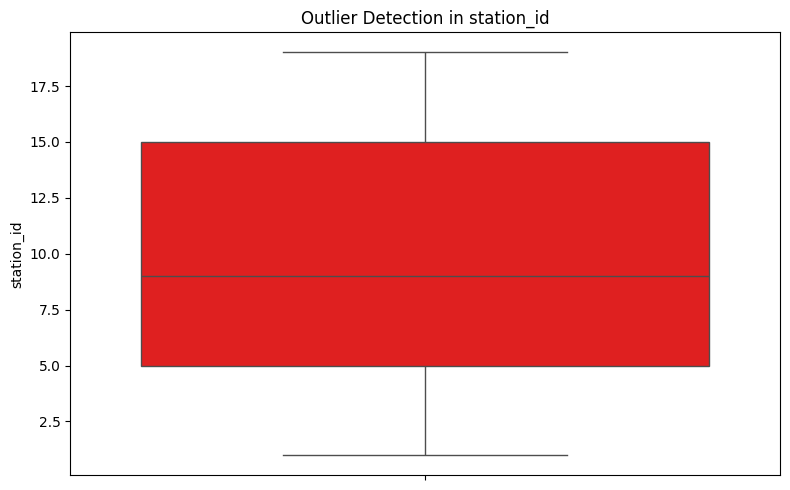

No outliers detected in station_id.



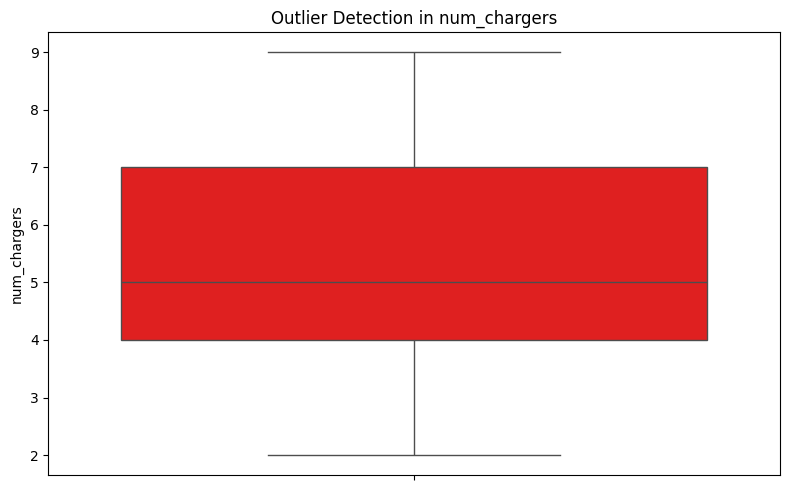

No outliers detected in num_chargers.



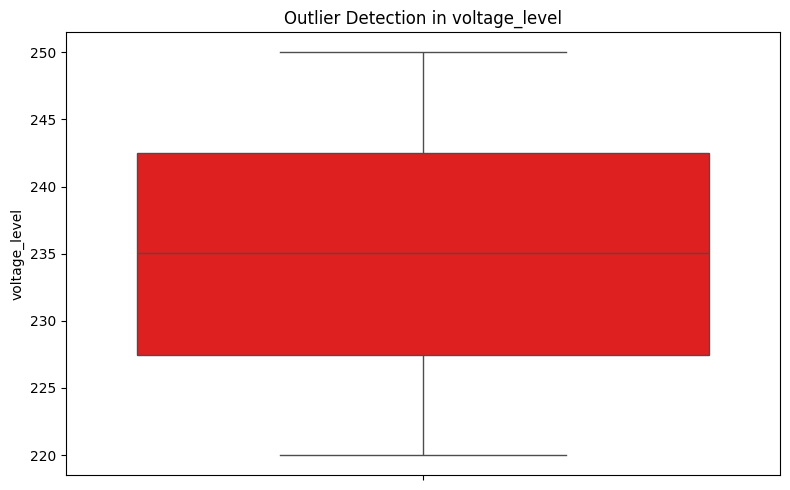

No outliers detected in voltage_level.



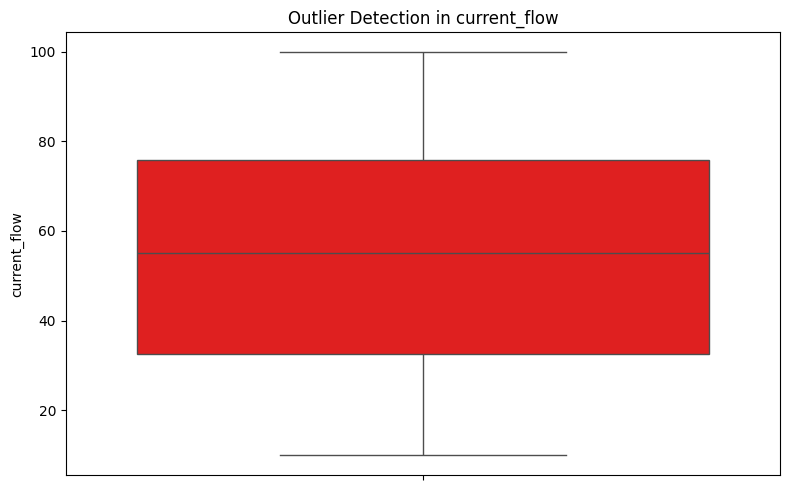

No outliers detected in current_flow.



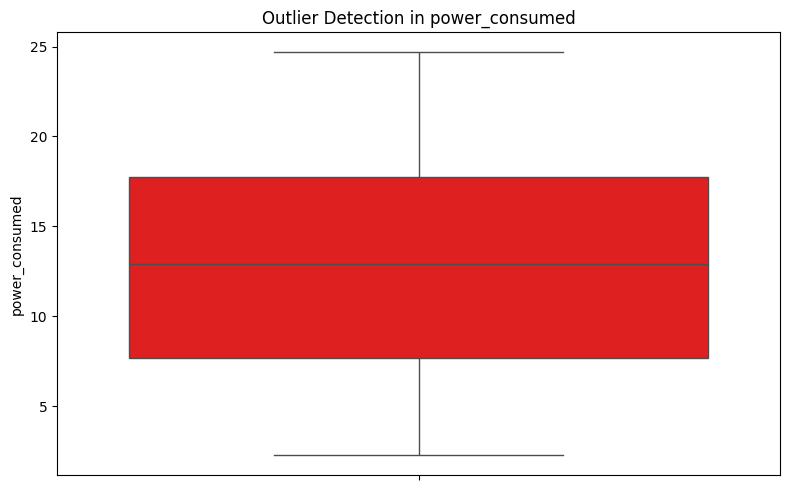

No outliers detected in power_consumed.



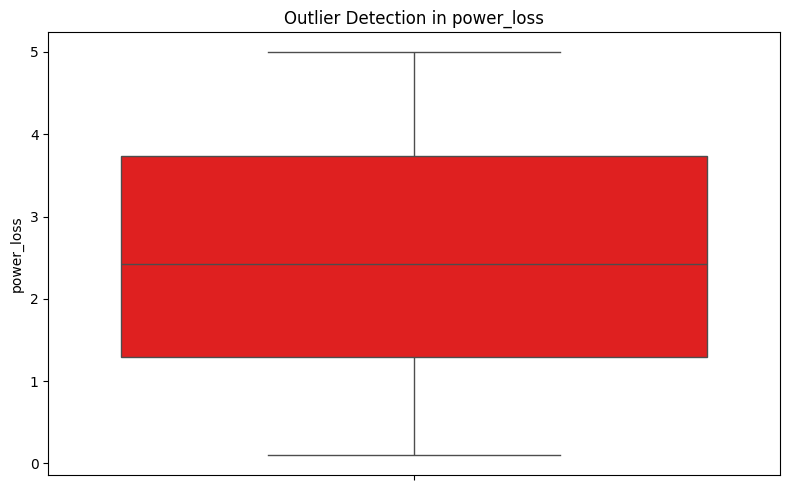

No outliers detected in power_loss.



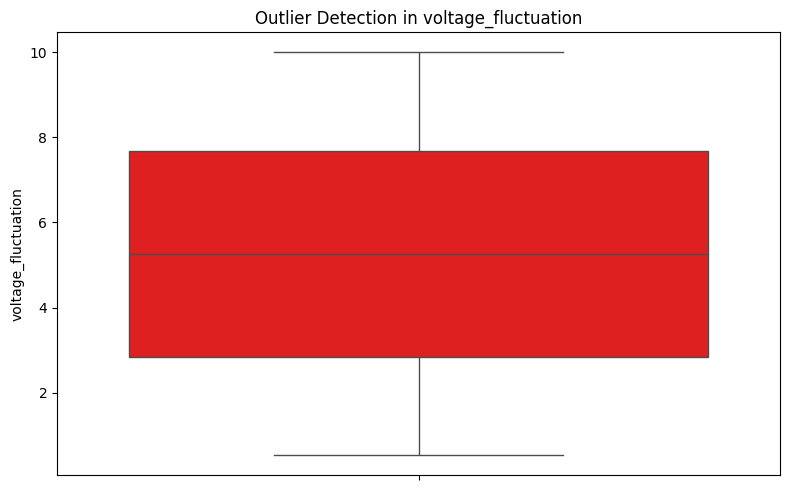

No outliers detected in voltage_fluctuation.



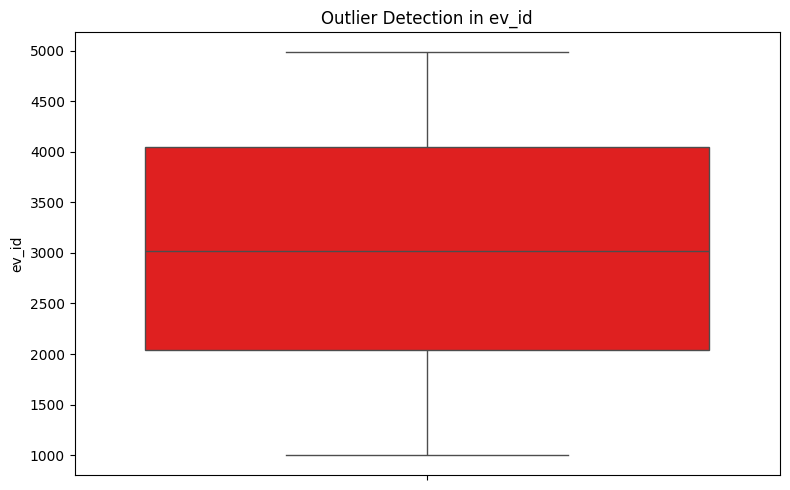

No outliers detected in ev_id.



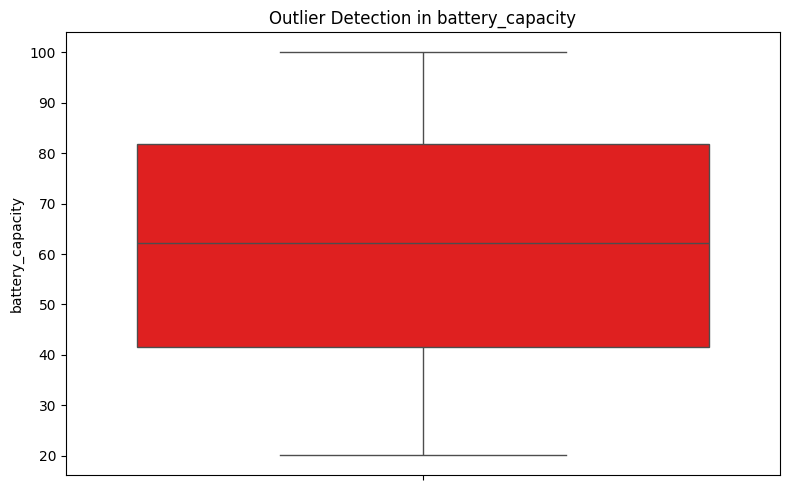

No outliers detected in battery_capacity.



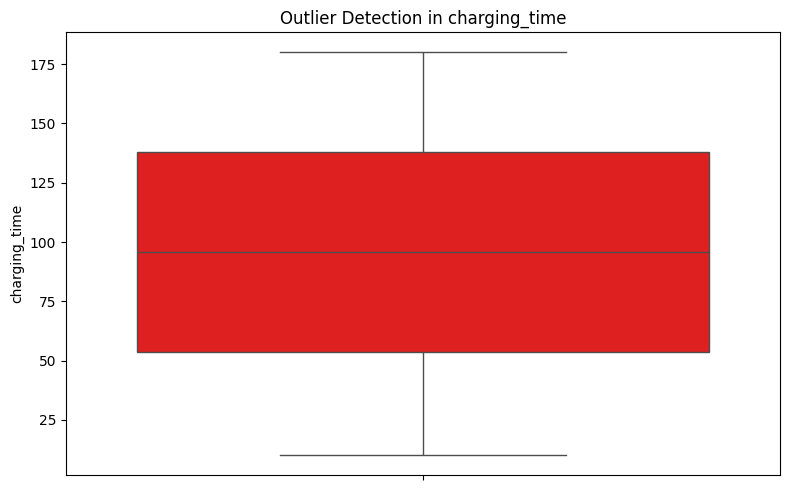

No outliers detected in charging_time.



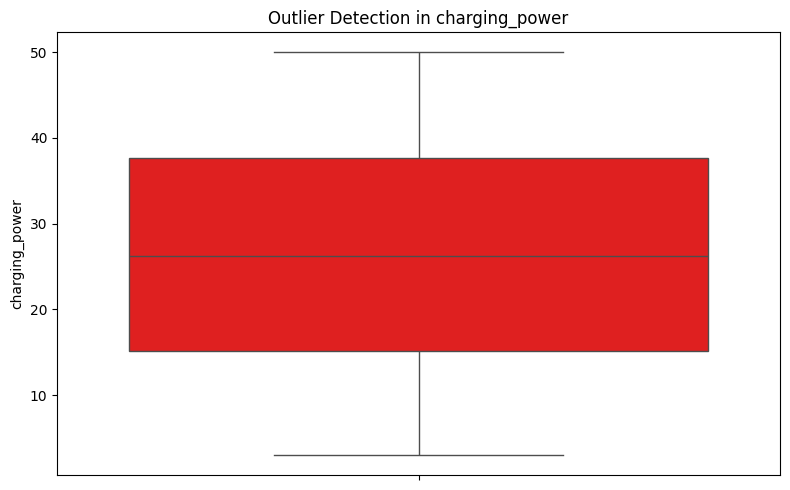

No outliers detected in charging_power.



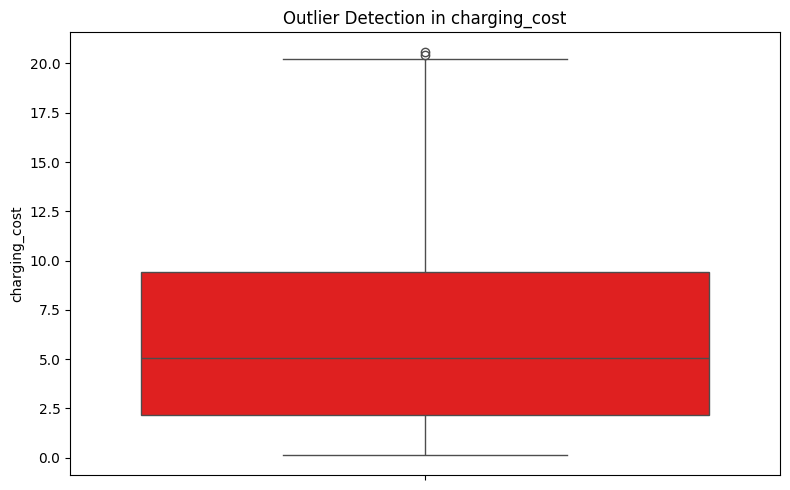

Outliers in charging_cost:
                      station_id location charging_type  num_chargers  \
timestamp                                                              
2024-01-05 11:30:00           4    Urban          Fast             6   
2024-01-08 05:45:00          17    Urban           V2G             3   

                     voltage_level  current_flow  power_consumed  power_loss  \
timestamp                                                                      
2024-01-05 11:30:00     231.133388     40.845783        9.440824    2.920760   
2024-01-08 05:45:00     244.199952     71.588282       17.481855    4.488223   

                     voltage_fluctuation  ev_id  battery_capacity  \
timestamp                                                           
2024-01-05 11:30:00             4.930559   3598         91.237566   
2024-01-08 05:45:00             8.941693   4489         55.741587   

                     charging_time  charging_power  charging_cost  \
timestamp       

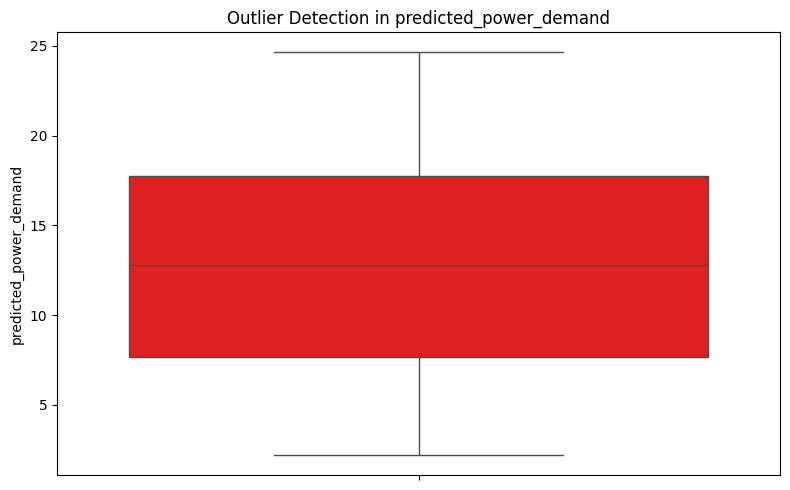

No outliers detected in predicted_power_demand.



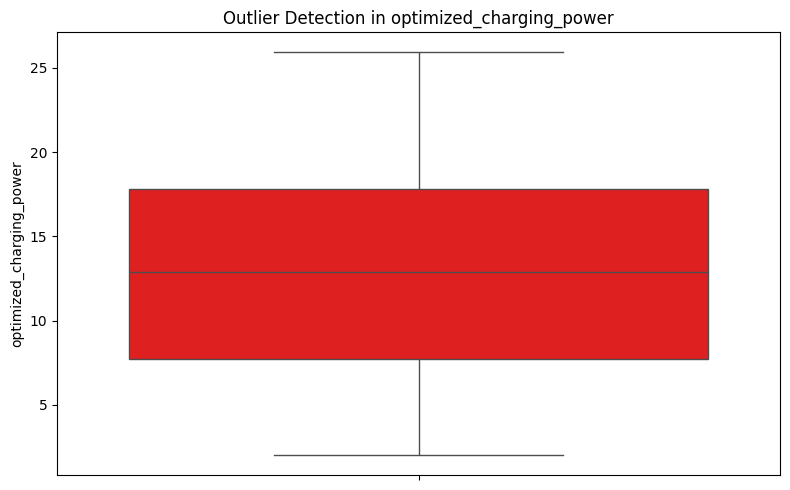

No outliers detected in optimized_charging_power.



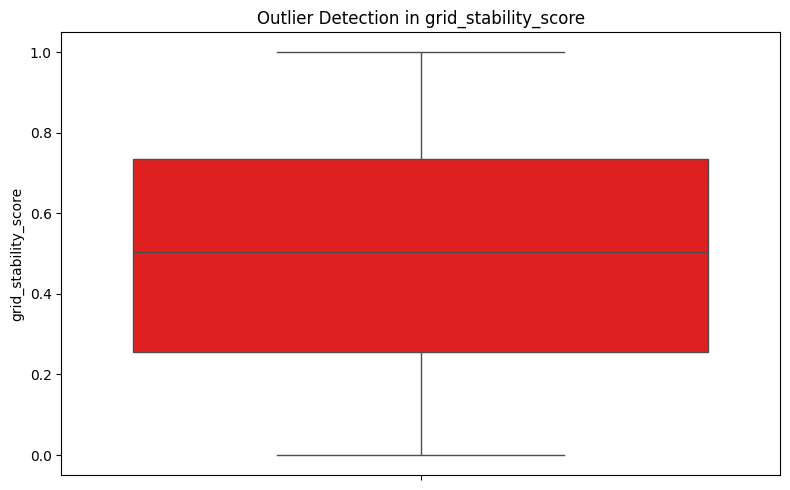

No outliers detected in grid_stability_score.



In [ ]:
detect_outliers(df)

In [ ]:
def plot_correlation_matrix(df):
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    # If there are no numerical columns, exit
    if numeric_df.shape[1] == 0:
        print("No numerical columns found for correlation matrix.")
        return

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()


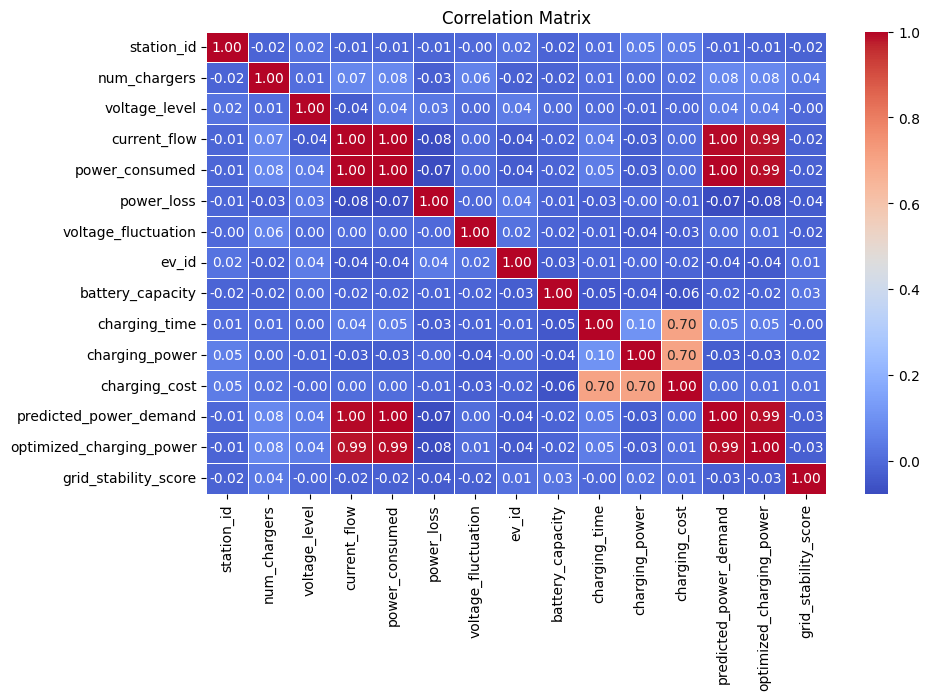

In [ ]:
plot_correlation_matrix(df)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [ ]:
# Function to visualize time series data
def plot_time_series(df, column):
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df[column], marker='o', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.title(f"Time Series Plot of {column}")
    plt.grid()
    plt.show()

In [ ]:
df1.dtypes

station_id                       int64
location                        object
charging_type                   object
num_chargers                     int64
voltage_level                  float64
current_flow                   float64
power_consumed                 float64
power_loss                     float64
voltage_fluctuation            float64
ev_id                            int64
battery_capacity               float64
charging_time                  float64
charging_power                 float64
charging_cost                  float64
predicted_power_demand         float64
optimized_charging_power       float64
grid_stability_score           float64
reduced_power_loss_category     object
voltage_stability_category      object
dtype: object

In [ ]:
df_2 = pd.read_csv("/content/EV_Charging_Grid_Optimization_Categorical.csv")

In [ ]:
df_t = convert_to_time_series(df_2,"timestamp")
df_t

station_id  location charging_type  num_chargers  \
timestamp                                                               
2024-01-01 00:00:00           7  Suburban           V2G             3   
2024-01-01 00:15:00          15     Rural  Conventional             4   
2024-01-01 00:30:00          11  Suburban           V2G             2   
2024-01-01 00:45:00           8  Suburban           V2G             5   
2024-01-01 01:00:00           7     Urban          Fast             5   
...                         ...       ...           ...           ...   
2024-01-11 08:45:00           1  Suburban  Conventional             8   
2024-01-11 09:00:00           8  Suburban           V2G             9   
2024-01-11 09:15:00           7     Urban          Fast             9   
2024-01-11 09:30:00           3     Urban           V2G             6   
2024-01-11 09:45:00          10  Suburban           V2G             2   

                     voltage_level  current_flow  power_consumed  power_loss  \
timestamp                                                                      
2024-01-01 00:00:00     243.194256     10.925605        2.657044    2.152952   
2024-01-01 00:15:00     235.538816     74.444498       17.534569    2.344340   
2024-01-01 00:30:00     230.442868     73.562155       16.951874    1.357571   
2024-01-01 00:45:00     231.152179     66.042059       15.265766    3.785360   
2024-01-01 01:00:00     220.040609     99.109796       21.808180    2.613086   
...                            ...           ...             ...         ...   
2024-01-11 08:45:00     246.545654     47.997301       11.833526    1.401859   
2024-01-11 09:00:00     242.172009     80.655753       19.532566    4.489497   
2024-01-11 09:15:00     228.323940     27.614138        6.304969    0.607028   
2024-01-11 09:30:00     228.448481     83.822799       19.149191    3.317157   
2024-01-11 09:45:00     248.900810     68.387240       17.021639    4.544229   

                     voltage_fluctuation  ev_id  battery_capacity  \
timestamp                                                           
2024-01-01 00:00:00             2.103120   4523         55.094776   
2024-01-01 00:15:00             9.699106   1904         63.260600   
2024-01-01 00:30:00             4.802392   1104         97.437584   
2024-01-01 00:45:00             9.484294   3047         40.414578   
2024-01-01 01:00:00             6.929790   3197         88.677620   
...                                  ...    ...               ...   
2024-01-11 08:45:00             8.270653   1986         75.091604   
2024-01-11 09:00:00             9.334257   4118         98.292327   
2024-01-11 09:15:00             5.678292   1760         78.128355   
2024-01-11 09:30:00             6.783929   4662         94.298350   
2024-01-11 09:45:00             9.081099   4693         84.344377   

                     charging_time  charging_power  charging_cost  \
timestamp                                                           
2024-01-01 00:00:00      37.729495       21.448731       1.991531   
2024-01-01 00:15:00      52.364641       16.695066       2.151447   
2024-01-01 00:30:00      68.117152       41.668615       6.985057   
2024-01-01 00:45:00      38.604276       24.216161       2.300621   
2024-01-01 01:00:00     108.880727       26.568029       7.118931   
...                            ...             ...            ...   
2024-01-11 08:45:00      86.741911       26.608181       5.680003   
2024-01-11 09:00:00      51.983748       10.816650       1.383773   
2024-01-11 09:15:00     144.280575       36.152886      12.836755   
2024-01-11 09:30:00     117.870939       16.704153       4.845467   
2024-01-11 09:45:00     100.560976       16.298536       4.033504   

                     predicted_power_demand  optimized_charging_power  \
timestamp                                                               
2024-01-01 00:00:00                3.032166                  3.028269   
2024-01-01 00:1

In [ ]:
df_t.head(5)

station_id  location charging_type  num_chargers  \
timestamp                                                               
2024-01-01 00:00:00           7  Suburban           V2G             3   
2024-01-01 00:15:00          15     Rural  Conventional             4   
2024-01-01 00:30:00          11  Suburban           V2G             2   
2024-01-01 00:45:00           8  Suburban           V2G             5   
2024-01-01 01:00:00           7     Urban          Fast             5   

                     voltage_level  current_flow  power_consumed  power_loss  \
timestamp                                                                      
2024-01-01 00:00:00     243.194256     10.925605        2.657044    2.152952   
2024-01-01 00:15:00     235.538816     74.444498       17.534569    2.344340   
2024-01-01 00:30:00     230.442868     73.562155       16.951874    1.357571   
2024-01-01 00:45:00     231.152179     66.042059       15.265766    3.785360   
2024-01-01 01:00:00     220.040609     99.109796       21.808180    2.613086   

                     voltage_fluctuation  ev_id  battery_capacity  \
timestamp                                                           
2024-01-01 00:00:00             2.103120   4523         55.094776   
2024-01-01 00:15:00             9.699106   1904         63.260600   
2024-01-01 00:30:00             4.802392   1104         97.437584   
2024-01-01 00:45:00             9.484294   3047         40.414578   
2024-01-01 01:00:00             6.929790   3197         88.677620   

                     charging_time  charging_power  charging_cost  \
timestamp                                                           
2024-01-01 00:00:00      37.729495       21.448731       1.991531   
2024-01-01 00:15:00      52.364641       16.695066       2.151447   
2024-01-01 00:30:00      68.117152       41.668615       6.985057   
2024-01-01 00:45:00      38.604276       24.216161       2.300621   
2024-01-01 01:00:00     108.880727       26.568029       7.118931   

                     predicted_power_demand  optimized_charging_power  \
timestamp                                                               
2024-01-01 00:00:00                3.032166                  3.028269   
2024-01-01 00:15:00               17.902533                 18.606271   
2024-01-01 00:30:00               17.082844                 16.300964   
2024-01-01 00:45:00               15.238747                 14.619174   
2024-01-01 01:00:00               21.980294                 23.483637   

                     grid_stability_score reduced_power_loss_category  \
timestamp                                                               
2024-01-01 00:00:00              0.100286                      Medium   
2024-01-01 00:15:00              0.336108                      Medium   
2024-01-01 00:30:00              0.379212                         Low   
2024-01-01 00:45:00              0.465619                      Medium   
2024-01-01 01:00:00              0.466621                      Medium   

                    voltage_stability_category  
timestamp                                       
2024-01-01 00:00:00                  Excellent  
2024-01-01 00:15:00                   Moderate  
2024-01-01 00:30:00                  Excellent  
2024-01-01 00:45:00                   Moderate  
2024-01-01 01:00:00                  Excellent

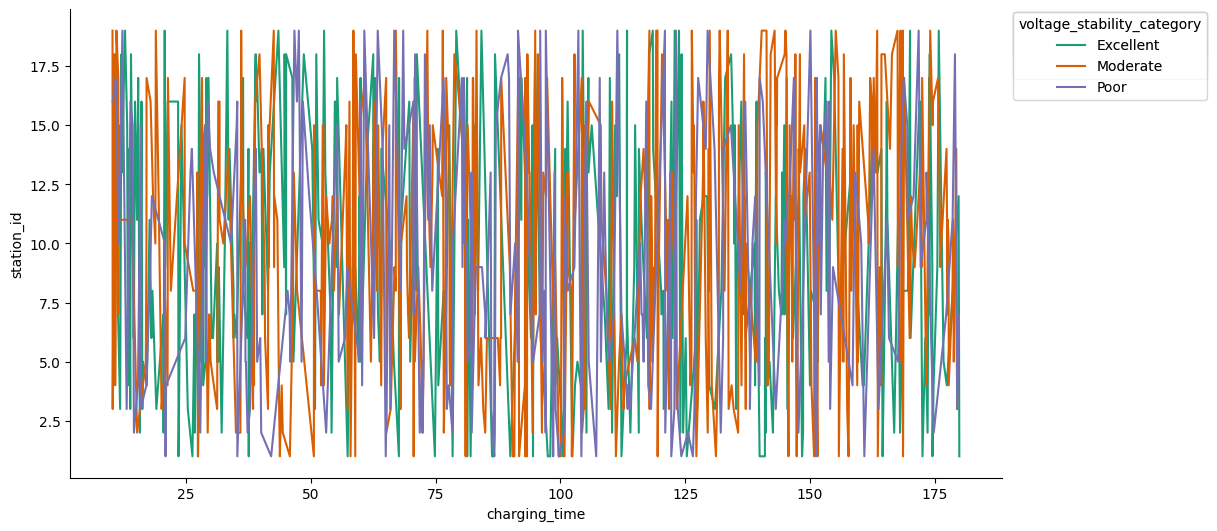

In [ ]:
# @title charging_time vs station_id

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['charging_time']
  ys = series['station_id']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2.sort_values('charging_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('voltage_stability_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='voltage_stability_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('charging_time')
_ = plt.ylabel('station_id')

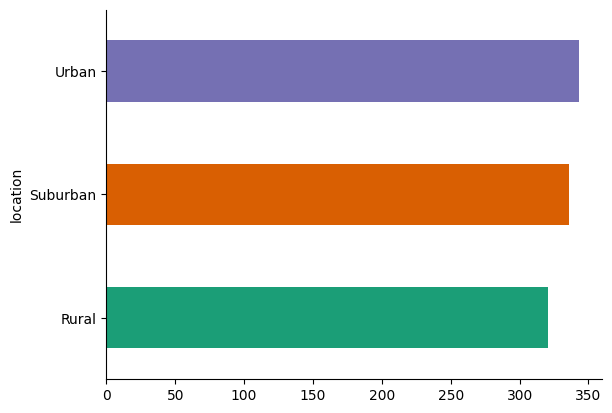

In [ ]:
# @title location

from matplotlib import pyplot as plt
import seaborn as sns
df_2.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

# Function to check stationarity using ADF Test
def check_stationarity(df, column):
    result = adfuller(df[column].dropna())  # Drop NaN values
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data is stationary (Reject Null Hypothesis)")
    else:
        print("Data is not stationary (Fail to Reject Null Hypothesis)")

# Function for time series decomposition (Trend, Seasonality, Residual)
def decompose_time_series(df, column, period=12):
    decomposition = seasonal_decompose(df[column], model='additive', period=period)

    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(df[column], label='Original')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to plot ACF and PACF for model selection
def plot_acf_pacf(df, column, lags=30):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    sm.graphics.tsa.plot_acf(df[column].dropna(), lags=lags, ax=ax[0])
    sm.graphics.tsa.plot_pacf(df[column].dropna(), lags=lags, ax=ax[1])

    ax[0].set_title("Autocorrelation Function (ACF)")
    ax[1].set_title("Partial Autocorrelation Function (PACF)")
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is properly formatted
df['grid_stability_score'] = df['grid_stability_score'].astype(float)
df['voltage_stability_category'] = df['voltage_stability_category'].astype(int)

# Scatter plot: Grid Stability Score vs. Voltage Stability Category
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['voltage_stability_category'], y=df['grid_stability_score'], alpha=0.7)
plt.xlabel("Voltage Stability Category")
plt.ylabel("Grid Stability Score")
plt.title("Grid Stability Score vs. Voltage Stability Category")
plt.show()

# Boxplot: Distribution of Grid Stability Score per Voltage Stability Category
plt.figure(figsize=(10,5))
sns.boxplot(x=df['voltage_stability_category'], y=df['grid_stability_score'])
plt.xlabel("Voltage Stability Category")
plt.ylabel("Grid Stability Score")
plt.title("Distribution of Grid Stability Score per Voltage Stability Category")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def preprocess_data(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M')
    df.set_index('timestamp', inplace=True)
    return df

def train_arima(df, target_column, order=(5,1,0)):
    model = ARIMA(df[target_column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=24)  # Forecast for the next 24 hours
    return forecast

def main(filepath, target_column):
    df = pd.read_csv(filepath)
    df = preprocess_data(df)

    print("ARIMA Forecast:")
    print(train_arima(df, target_column))


    plt.figure(figsize=(12,6))
    plt.plot(df[target_column], label='Original Data')
    plt.plot(train_arima(df, target_column), label='ARIMA Forecast', linestyle='dashed')
    plt.legend()
    plt.show()

    return train_arima(df, target_column)

# Example usage:
# arima_results, prophet_results = main('your_file.csv', 'power_consumed')


In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


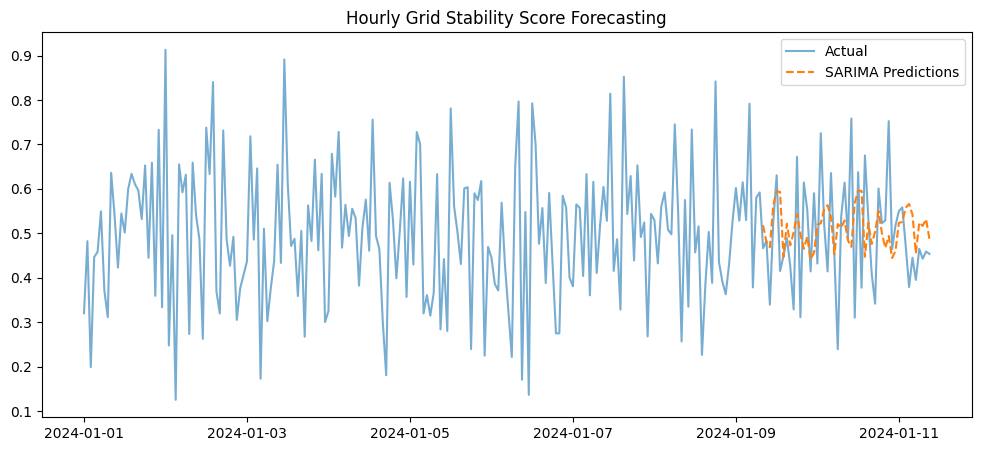

Mean Absolute Error (MAE): 0.0963
Root Mean Squared Error (RMSE): 0.1252


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset (Replace with your actual dataset loading method)
# df_hourly = pd.read_csv("your_data.csv", parse_dates=["timestamp"], index_col="timestamp")

# Assume target column is 'grid_stability_score' (Update if different)
target_col = "grid_stability_score"

# Split into train-test (adjust split ratio as needed)
train_size = 0.8  # 80% train, 20% test
train_index = int(len(df_hourly) * train_size)
train, test = df_hourly.iloc[:train_index], df_hourly.iloc[train_index:]

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(
    train[target_col],
    order=(2, 1, 2),  # Adjust based on your model selection
    seasonal_order=(1, 1, 1, 24),  # Adjust for seasonality if needed
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Make predictions
test_predictions = sarima_model.predict(start=len(train), end=len(df_hourly) - 1, dynamic=False)

# Ensure the forecast column aligns with test data
df_hourly.loc[test.index, "sarima_forecast"] = test_predictions

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(df_hourly.index, df_hourly[target_col], label='Actual', alpha=0.6)

# Ensure correct slicing for forecast values
plt.plot(df_hourly.index[-len(test):], df_hourly['sarima_forecast'].iloc[-len(test):], label='SARIMA Predictions', linestyle='dashed')

plt.title("Hourly Grid Stability Score Forecasting")
plt.legend()
plt.show()

# Evaluate model
mae = mean_absolute_error(test[target_col], test_predictions)
rmse = np.sqrt(mean_squared_error(test[target_col], test_predictions))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


<ipython-input-45-0f6bf77b0a6e>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start="2024-01-01", periods=num_hours, freq="H")


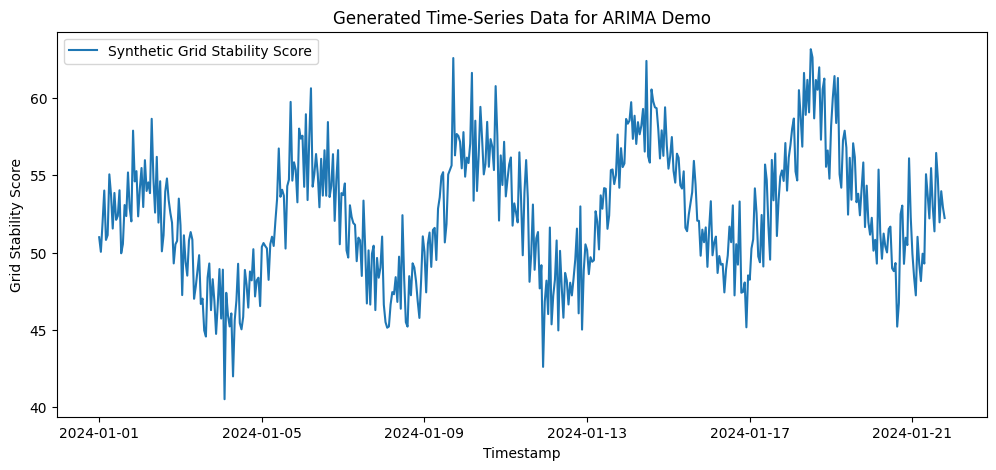

                     grid_stability_score
timestamp                                
2024-01-01 00:00:00             50.993428
2024-01-01 01:00:00             50.048072
2024-01-01 02:00:00             51.943333
2024-01-01 03:00:00             54.014882
2024-01-01 04:00:00             50.817662


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate hourly timestamps
num_hours = 500  # Change this for a longer dataset
date_rng = pd.date_range(start="2024-01-01", periods=num_hours, freq="H")

# Generate synthetic trend (gradual increase or decrease)
trend = np.linspace(50, 55, num_hours)

# Generate seasonality (daily pattern: 24-hour cycle)
seasonality = 5 * np.sin(np.linspace(0, 10 * np.pi, num_hours))

# Add noise (random fluctuations)
noise = np.random.normal(0, 2, num_hours)

# Combine all components
grid_stability_score = trend + seasonality + noise

# Create DataFrame
df_hourly = pd.DataFrame({"timestamp": date_rng, "grid_stability_score": grid_stability_score})
df_hourly.set_index("timestamp", inplace=True)

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(df_hourly.index, df_hourly["grid_stability_score"], label="Synthetic Grid Stability Score")
plt.xlabel("Timestamp")
plt.ylabel("Grid Stability Score")
plt.title("Generated Time-Series Data for ARIMA Demo")
plt.legend()
plt.show()

# Save the dataset (optional)
# df_hourly.to_csv("synthetic_grid_stability.csv")

# Display sample
print(df_hourly.head())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
<ipython-input-12-a8e1329832c8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["sarima_forecast"] = predictions.predicted_mean  # Extract predicted values


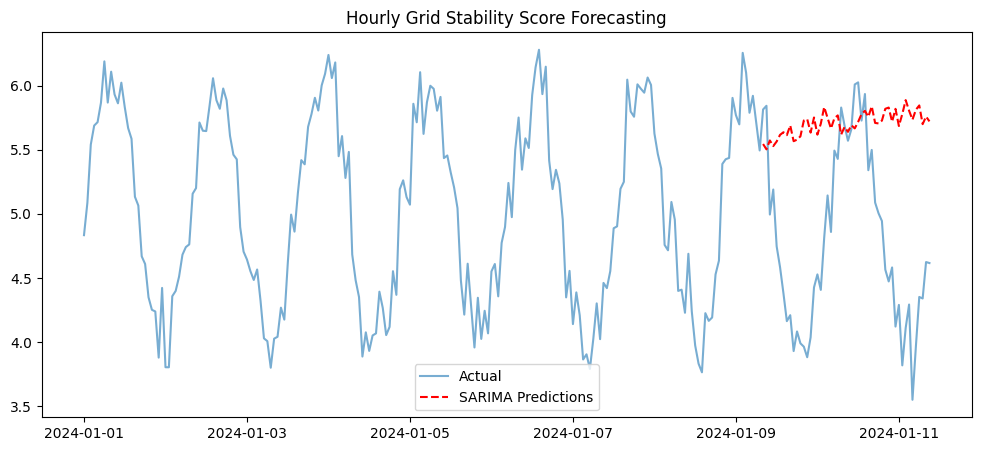

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle

# Function to generate sample time-series data
def generate_data(start_date="2024-01-01", periods=250, freq="h"):
    """Generate synthetic hourly grid stability score data."""
    date_rng = pd.date_range(start=start_date, periods=periods, freq="h")  # Fixed 'h'
    stability_scores = np.sin(np.linspace(0, 50, periods)) + np.random.normal(scale=0.2, size=periods) + 5
    df = pd.DataFrame({"timestamp": date_rng, "grid_stability_score": stability_scores})
    df.set_index("timestamp", inplace=True)
    return df

# Function to train SARIMA model
def train_sarima_model(df, order=(1,1,1), seasonal_order=(1,1,1,24)):
    """Train and save SARIMA model."""
    model = SARIMAX(df["grid_stability_score"], order=order, seasonal_order=seasonal_order)
    result = model.fit()
    pickle.dump(result, open("sarima_model.pkl", "wb"))  # Save model
    return result

# Function to load and test SARIMA model
def test_sarima_model(model, test):
    """Make predictions using the pre-trained SARIMA model."""
    predictions = model.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
    test["sarima_forecast"] = predictions.predicted_mean  # Extract predicted values
    return test

# Main execution
def main():
    # Step 1: Generate demo data
    df = generate_data()

    # Step 2: Train and save SARIMA model
    model = train_sarima_model(df[:200])  # Train on first 200 samples

    # Step 3: Load model and predict
    loaded_model = pickle.load(open("sarima_model.pkl", "rb"))
    test_df = df[200:]  # Use last 50 samples for testing
    test_df = test_sarima_model(loaded_model, test_df)

    # Step 4: Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df["grid_stability_score"], label="Actual", alpha=0.6)
    plt.plot(test_df.index, test_df["sarima_forecast"], label="SARIMA Predictions", linestyle="dashed", color="red")
    plt.title("Hourly Grid Stability Score Forecasting")
    plt.legend()
    plt.show()

# Run the process
if __name__ == "__main__":
    main()


<ipython-input-15-76d1a1fa3cde>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq("H")  # Assuming hourly data; adjust frequency as needed
<ipython-input-15-76d1a1fa3cde>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=11.16 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-368.426, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-643.605, Time=11.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-502.929, Time=2.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[24]             : AIC=288.131, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-652.405, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=-650.666, Time=3.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=15.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=-650.693, Time=4.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-650.647, Time=2.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-502.466, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[24] intercept   : AIC=-650.476, Time=2.55 sec
 ARIMA(1,0,0)(0,0,0)[24]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[24] intercept
Total fit time: 53.613 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


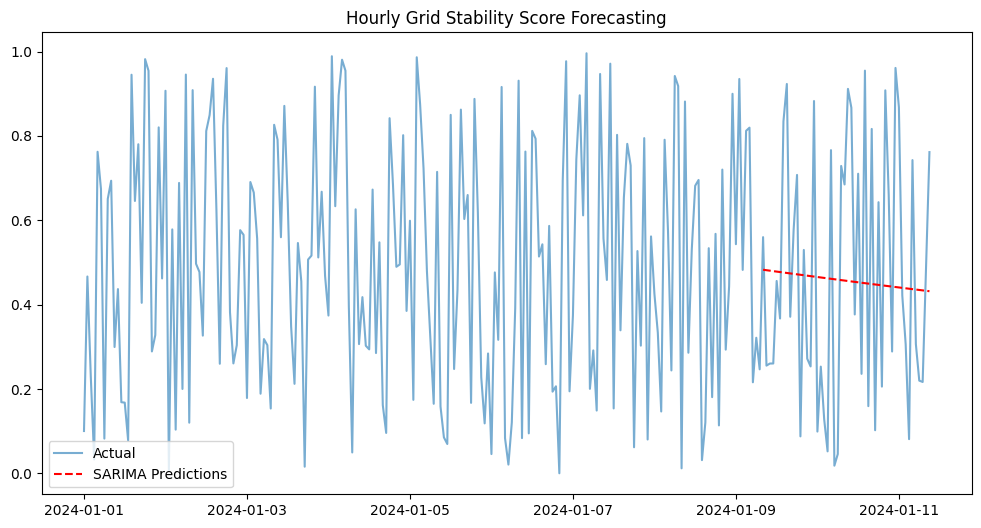

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset (Replace with your actual dataset)
df = pd.read_csv("/content/EV_Charging_Grid_Optimization_Categorical.csv", parse_dates=["timestamp"], index_col="timestamp")

# Ensure data is in time series format
df = df.asfreq("H")  # Assuming hourly data; adjust frequency as needed

# Fill missing values using forward fill (or interpolate for smoother results)
df.fillna(method="ffill", inplace=True)

# Apply Exponential Smoothing to reduce noise
df["smoothed"] = df["grid_stability_score"].ewm(span=12, adjust=False).mean()

# Split into training and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Use Auto-ARIMA for best hyperparameters
auto_model = pm.auto_arima(train["smoothed"], seasonal=True, m=24,  # Assuming daily seasonality
                           stepwise=True, trace=True, suppress_warnings=True)

# Extract best parameters
p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

# Fit SARIMA model with tuned hyperparameters
sarima_model = SARIMAX(train["smoothed"],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Forecast
forecast = sarima_result.predict(start=test.index[0], end=test.index[-1])

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["grid_stability_score"], label="Actual", alpha=0.6)
plt.plot(test.index, forecast, linestyle="dashed", color="red", label="SARIMA Predictions")
plt.legend()
plt.title("Hourly Grid Stability Score Forecasting")
plt.show()


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.4 MB/s eta 0:00:00


Prediction file not found. Plotting only actual data.


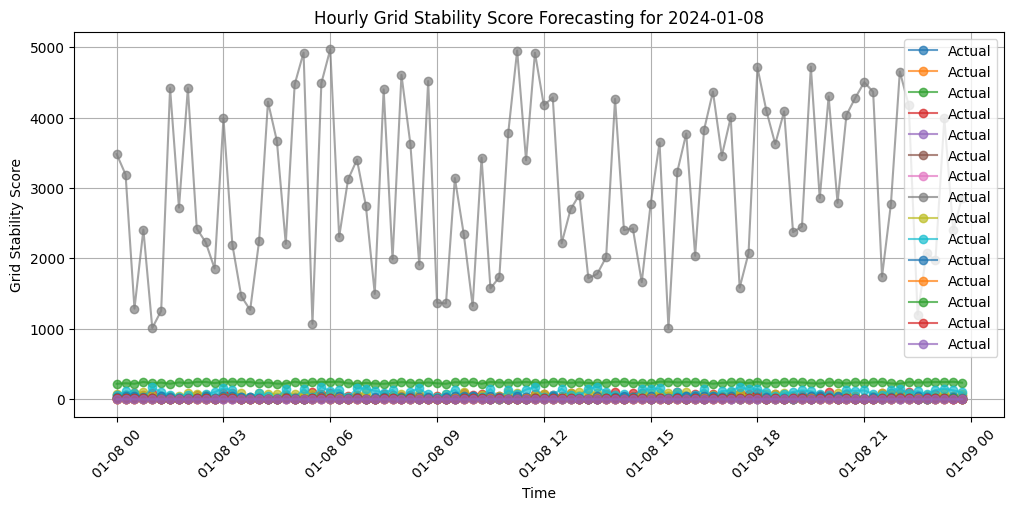

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_data.csv' with your actual file path)
df = pd.read_csv("/content/EV_Charging_Grid_Optimization_Categorical.csv", parse_dates=["timestamp"], index_col="timestamp")

# Define the target date for analysis
target_date = "2024-01-08"

# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

# Check if the target date exists in the dataset
if target_date not in df.index.strftime('%Y-%m-%d').unique():
    raise KeyError(f"Date {target_date} not found in dataset. Check available dates.")

# Filter data for the specific target date
actual_one_day = df[df.index.strftime('%Y-%m-%d') == target_date]

# Ensure only numeric data is used for plotting
actual_one_day = actual_one_day.select_dtypes(include=['number'])

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(actual_one_day.index, actual_one_day, label="Actual", marker="o", linestyle="-", alpha=0.7)

# If you have predictions, replace 'sarima_predictions.csv' with your actual file
try:
    forecast_df = pd.read_csv("sarima_predictions.csv", parse_dates=["timestamp"], index_col="timestamp")
    forecast_df.index = pd.to_datetime(forecast_df.index)

    # Extract predictions for the same target date
    forecast_one_day = forecast_df[forecast_df.index.strftime('%Y-%m-%d') == target_date]
    forecast_one_day = forecast_one_day.select_dtypes(include=['number'])  # Keep only numeric columns

    plt.plot(forecast_one_day.index, forecast_one_day, label="SARIMA Predictions", marker="s", linestyle="dashed", color="red")
except FileNotFoundError:
    print("Prediction file not found. Plotting only actual data.")

# Customize plot
plt.xlabel("Time")
plt.ylabel("Grid Stability Score")
plt.title(f"Hourly Grid Stability Score Forecasting for {target_date}")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


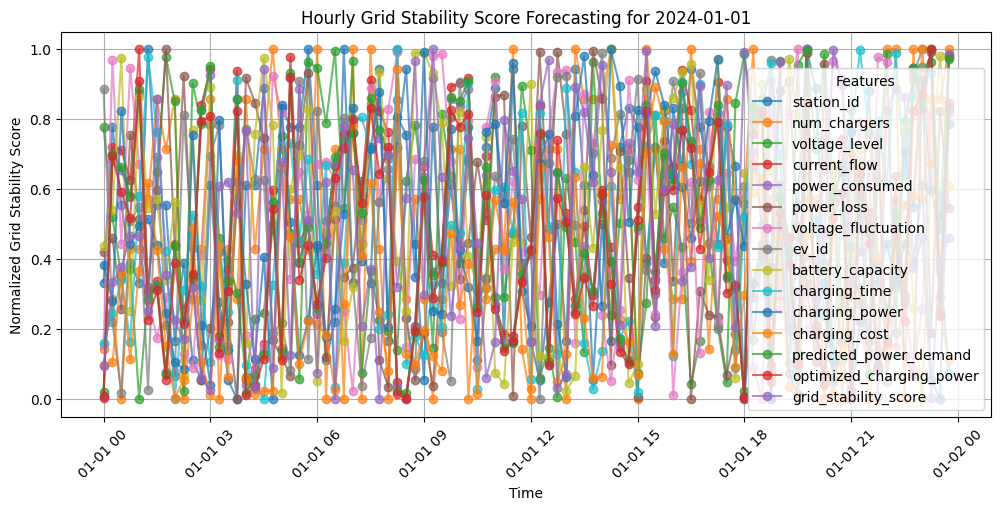

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/EV_Charging_Grid_Optimization_Categorical.csv", parse_dates=["timestamp"], index_col="timestamp")

# Convert index to datetime format
df.index = pd.to_datetime(df.index)
df = df.sort_index()  # Ensure the index is sorted

# Define target date
target_date = "2024-01-01"

# Check if date exists
if target_date not in df.index.strftime('%Y-%m-%d').unique():
    raise KeyError(f"Date {target_date} not found in dataset. Check available dates.")

# Filter data for the specific date
actual_one_day = df[df.index.strftime('%Y-%m-%d') == target_date]

# Keep only numeric columns
actual_one_day = actual_one_day.select_dtypes(include=['number'])

# Normalize data for better visualization
actual_one_day_norm = (actual_one_day - actual_one_day.min()) / (actual_one_day.max() - actual_one_day.min())

# Plot
plt.figure(figsize=(12, 5))
for column in actual_one_day_norm.columns:
    plt.plot(actual_one_day_norm.index, actual_one_day_norm[column], label=column, marker="o", alpha=0.7)

# Formatting
plt.xlabel("Time")
plt.ylabel("Normalized Grid Stability Score")
plt.title(f"Hourly Grid Stability Score Forecasting for {target_date}")
plt.legend(title="Features", loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-22-c3c574c3b945>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start="2024-01-01", end="2024-01-11", freq="H")


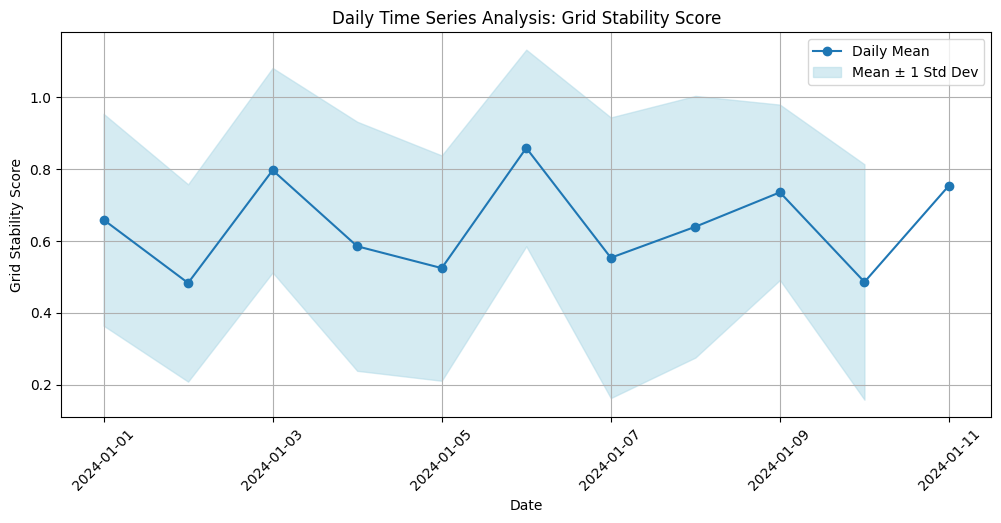

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate hourly timestamps from Jan 1, 2024, to Jan 11, 2024
date_range = pd.date_range(start="2024-01-01", end="2024-01-11", freq="H")

# Generate "Actual" values (random fluctuations to simulate grid stability)
actual_values = np.abs(np.sin(np.linspace(0, 20, len(date_range))) + np.random.normal(0, 0.2, len(date_range)))

# Create DataFrame
df = pd.DataFrame({"timestamp": date_range, "Actual": actual_values})
df.set_index("timestamp", inplace=True)

# Aggregate daily statistics
daily_summary = df.resample('D').agg(['mean', 'std', 'min', 'max'])

# Plot daily mean and std
plt.figure(figsize=(12, 5))
plt.plot(daily_summary.index, daily_summary[('Actual', 'mean')], label="Daily Mean", marker='o')
plt.fill_between(daily_summary.index,
                 daily_summary[('Actual', 'mean')] - daily_summary[('Actual', 'std')],
                 daily_summary[('Actual', 'mean')] + daily_summary[('Actual', 'std')],
                 color='lightblue', alpha=0.5, label="Mean ± 1 Std Dev")

# Formatting
plt.title("Daily Time Series Analysis: Grid Stability Score")
plt.xlabel("Date")
plt.ylabel("Grid Stability Score")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-21-b3c53417116d>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start="2024-01-01", end="2024-01-11", freq="H")


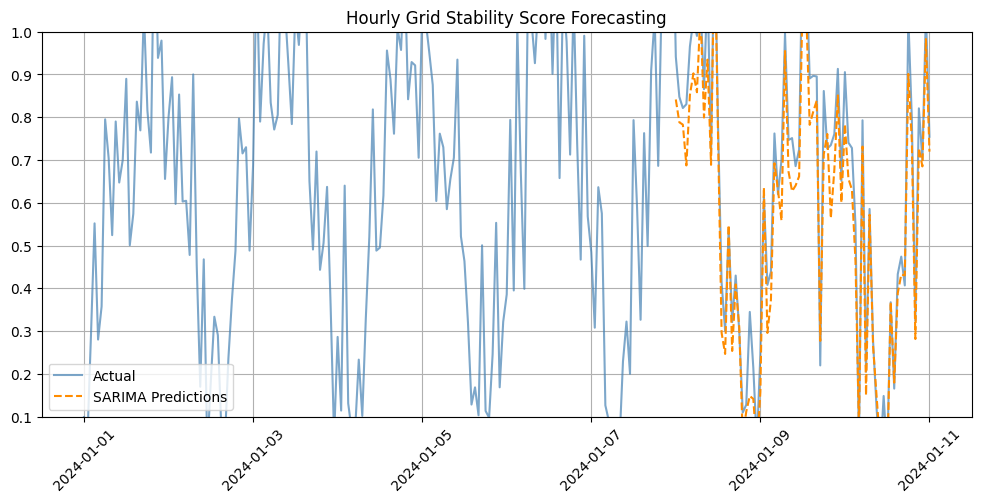

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate hourly timestamps from Jan 1, 2024, to Jan 11, 2024
date_range = pd.date_range(start="2024-01-01", end="2024-01-11", freq="H")

# Generate "Actual" values (random fluctuations to simulate grid stability)
actual_values = np.abs(np.sin(np.linspace(0, 20, len(date_range))) + np.random.normal(0, 0.2, len(date_range)))

# Create a DataFrame
df = pd.DataFrame({"timestamp": date_range, "Actual": actual_values})
df.set_index("timestamp", inplace=True)

# Generate "Predicted" values (SARIMA-like smoothing from Jan 8, 2024, onward)
prediction_start = "2024-01-08"
predicted_values = df.loc[prediction_start:].copy()
predicted_values["SARIMA Predictions"] = predicted_values["Actual"] * 0.9 + np.random.normal(0, 0.05, len(predicted_values))

# Plot the actual values
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Actual"], label="Actual", color="steelblue", alpha=0.7)

# Overlay SARIMA predictions from Jan 8 onwards
plt.plot(predicted_values.index, predicted_values["SARIMA Predictions"], linestyle="dashed", color="darkorange", label="SARIMA Predictions")

# Formatting
plt.title("Hourly Grid Stability Score Forecasting")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0.1, 1)  # Keep values between 0.1 and 1 for readability
plt.show()


In [ ]:
!pip install tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1358 - val_loss: 0.0805
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0884 - val_loss: 0.0818
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0867 - val_loss: 0.0840
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0874 - val_loss: 0.0799
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0813 - val_loss: 0.0798
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0863 - val_loss: 0.0798
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0880 - val_loss: 0.0796
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0882 - val_loss: 0.0796
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0844 - val_loss: 0.0801
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0845 - val_loss: 0.0798
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0829 - val_loss: 0.0815
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/ste

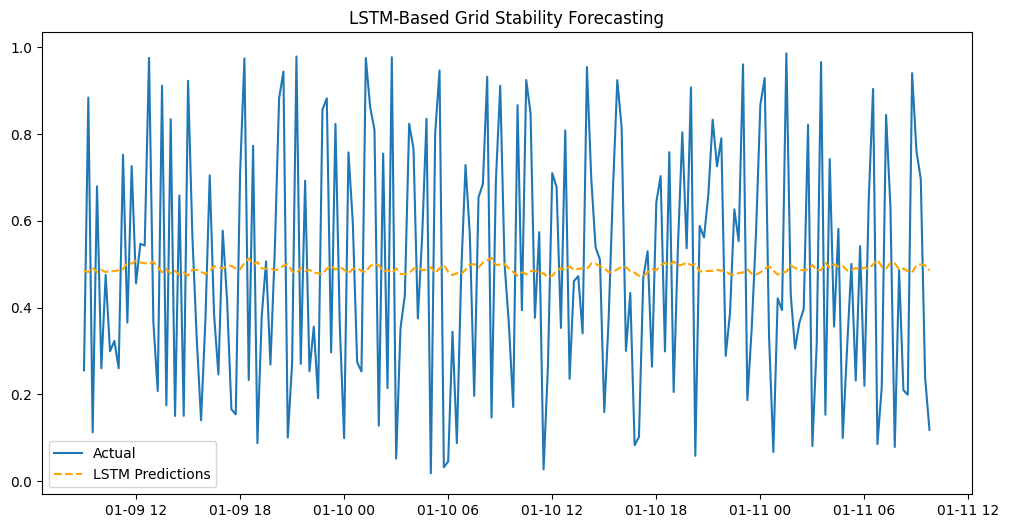

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv("/content/EV_Charging_Grid_Optimization_Categorical.csv", parse_dates=['timestamp'], index_col='timestamp')

# Select the feature to predict (e.g., 'grid_stability_score')
target_column = 'grid_stability_score'
data = df[[target_column]].dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, look_back=24):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Create sequences
look_back = 24  # Predicting using the last 24 hours
X, y = create_sequences(data_scaled, look_back)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Convert back to original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(y_test):], y_pred_inv, linestyle="dashed", label="LSTM Predictions", color="orange")
plt.legend()
plt.title("LSTM-Based Grid Stability Forecasting")
plt.show()


In [ ]:
# Train & Validation Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training and Validation Loss")
plt.legend()
plt.show()

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_train_inv = scaler.inverse_transform(y_train)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Visualization of Predictions
plt.figure(figsize=(12, 6))

# Training Predictions
plt.subplot(2, 1, 1)
plt.plot(df.index[:len(y_train_inv)], y_train_inv, label="Actual Train")
plt.plot(df.index[:len(y_train_inv)], y_train_pred_inv, label="LSTM Train Predictions", linestyle="dashed")
plt.legend()
plt.title("LSTM Training Predictions")

# Test Predictions
plt.subplot(2, 1, 2)
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label="Actual Test")
plt.plot(df.index[-len(y_test_inv):], y_test_pred_inv, label="LSTM Test Predictions", linestyle="dashed")
plt.legend()
plt.title("LSTM Test Predictions")

plt.tight_layout()
plt.show()


KeyError: 'loss'

<Figure size 1000x500 with 0 Axes>

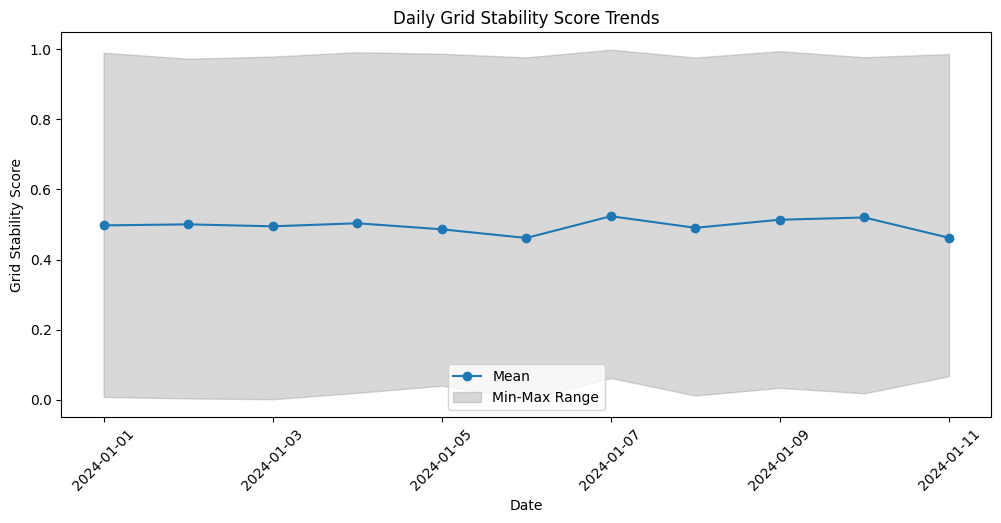

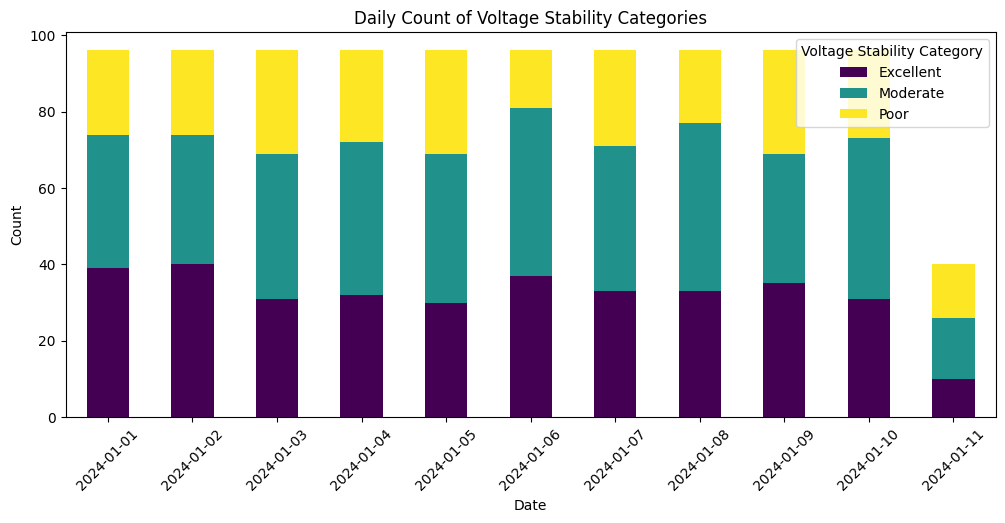

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace 'your_data.csv' with actual filename)
df = pd.read_csv('/content/EV_Charging_Grid_Optimization_Categorical.csv', parse_dates=['timestamp'])

# Extract date from timestamp
df['Date'] = df['timestamp'].dt.date

# Aggregate grid_stability_score by day
daily_stats = df.groupby('Date')['grid_stability_score'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Count occurrences of each voltage_stability_category per day
daily_categories = df.groupby(['Date', 'voltage_stability_category']).size().unstack(fill_value=0)

# Plot daily trends for grid_stability_score
plt.figure(figsize=(12, 5))
plt.plot(daily_stats['Date'], daily_stats['mean'], label='Mean', marker='o')
plt.fill_between(daily_stats['Date'], daily_stats['min'], daily_stats['max'], color='gray', alpha=0.3, label='Min-Max Range')
plt.xlabel('Date')
plt.ylabel('Grid Stability Score')
plt.title('Daily Grid Stability Score Trends')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot daily category counts
daily_categories.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Count of Voltage Stability Categories')
plt.legend(title='Voltage Stability Category')
plt.xticks(rotation=45)
plt.show()


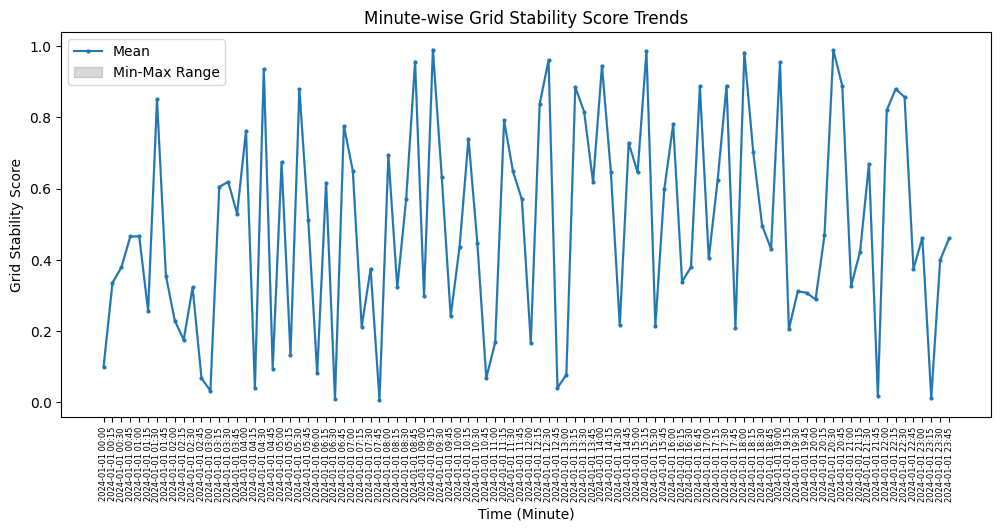

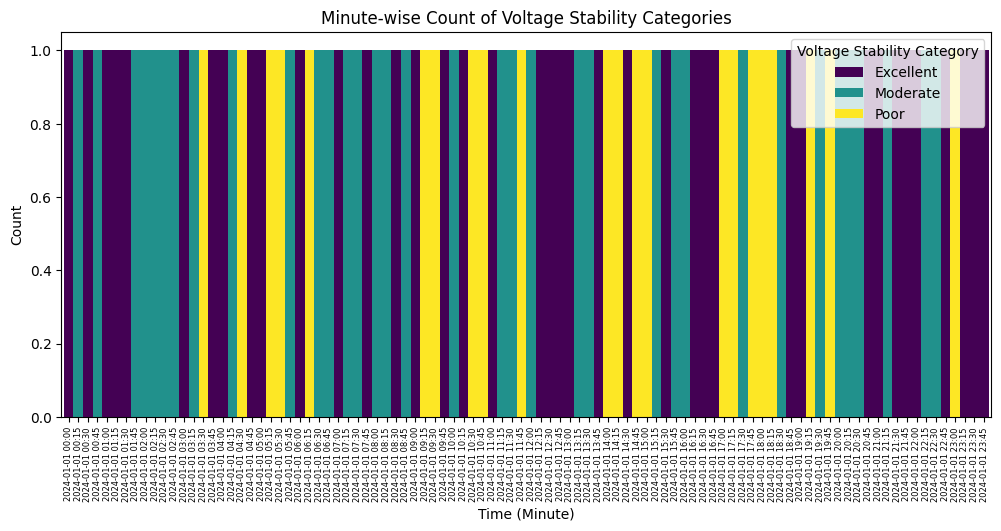

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace 'your_data.csv' with actual filename)
df = pd.read_csv('/content/EV_Charging_Grid_Optimization_Categorical.csv', parse_dates=['timestamp'])

# Filter data for the specific date range
start_time = '2024-01-01 00:00:00'
end_time = '2024-01-01 23:45:00'
df = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

# Extract minute-level data
df['Minute'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M')

# Aggregate grid_stability_score by minute
minute_stats = df.groupby('Minute')['grid_stability_score'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Count occurrences of each voltage_stability_category per minute
minute_categories = df.groupby(['Minute', 'voltage_stability_category']).size().unstack(fill_value=0)

# Plot minute-level trends for grid_stability_score
plt.figure(figsize=(12, 5))
plt.plot(minute_stats['Minute'], minute_stats['mean'], label='Mean', marker='o', markersize=2, linestyle='-')
plt.fill_between(minute_stats['Minute'], minute_stats['min'], minute_stats['max'], color='gray', alpha=0.3, label='Min-Max Range')
plt.xlabel('Time (Minute)')
plt.ylabel('Grid Stability Score')
plt.title('Minute-wise Grid Stability Score Trends')
plt.legend()
plt.xticks(rotation=90, fontsize=6)
plt.show()

# Plot minute-level category counts
minute_categories.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis', width=1)
plt.xlabel('Time (Minute)')
plt.ylabel('Count')
plt.title('Minute-wise Count of Voltage Stability Categories')
plt.legend(title='Voltage Stability Category')
plt.xticks(rotation=90, fontsize=6)
plt.show()


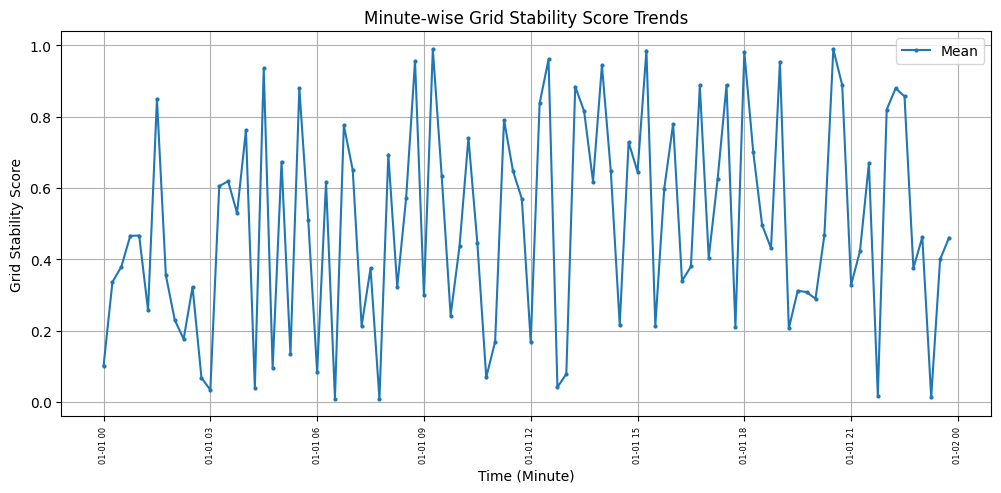

ADF Statistic: -10.717311430940306
p-value: 3.216726796276852e-19
Data is stationary (Reject Null Hypothesis)


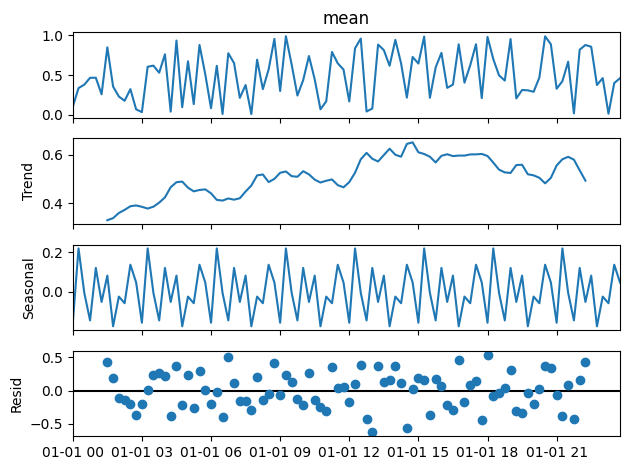

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


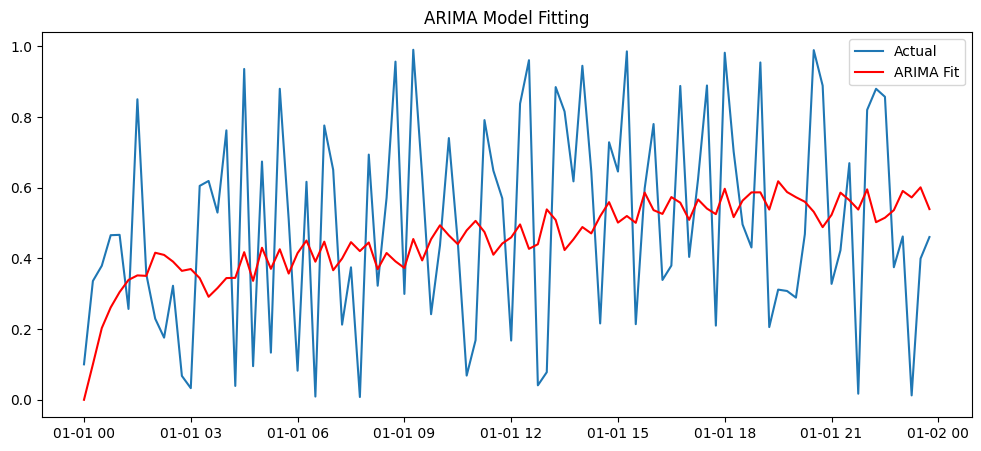

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


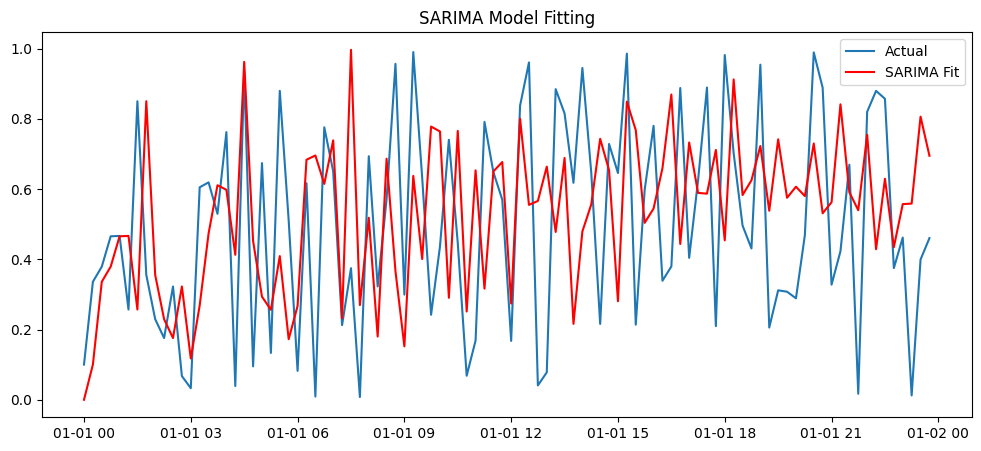

<ipython-input-39-32802f0ddec0>:96: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.plot(pd.date_range(start=minute_stats.index[-1], periods=steps+1, freq='T')[1:],


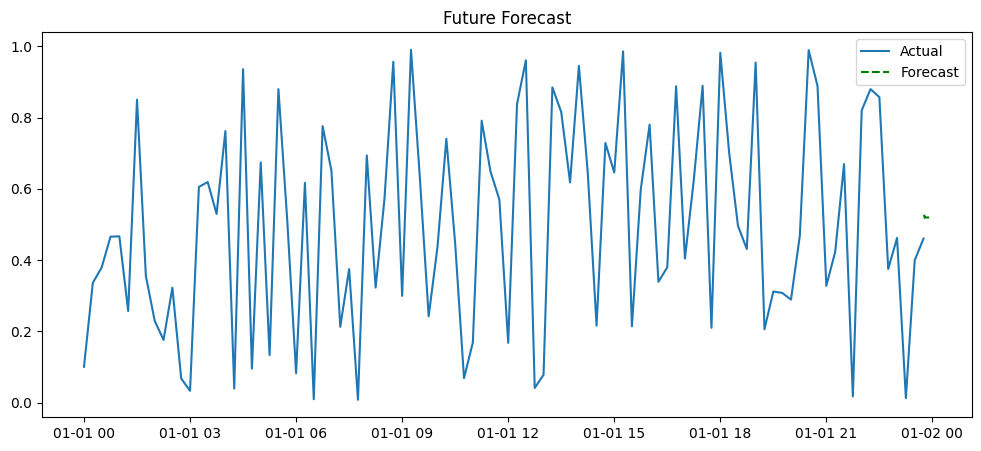

<ipython-input-39-32802f0ddec0>:96: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.plot(pd.date_range(start=minute_stats.index[-1], periods=steps+1, freq='T')[1:],


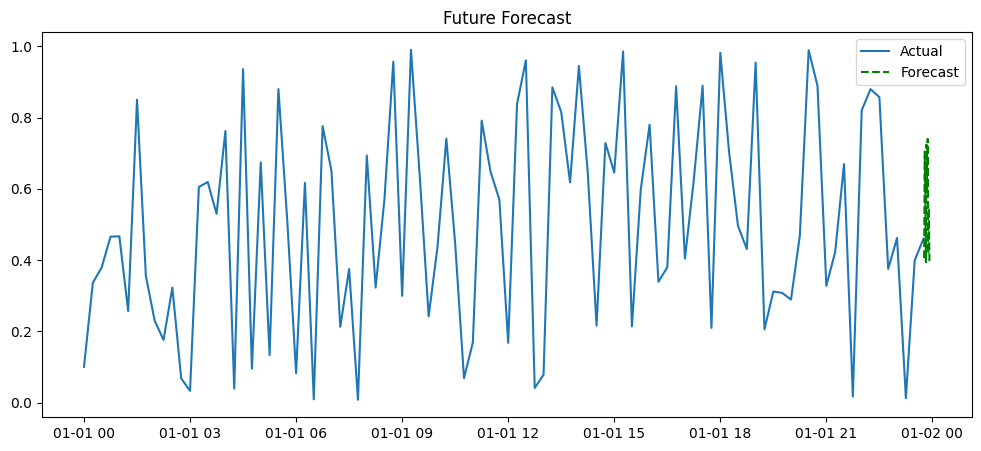

2024-01-02 00:00:00    0.405450
2024-01-02 00:15:00    0.704434
2024-01-02 00:30:00    0.598207
2024-01-02 00:45:00    0.393977
2024-01-02 01:00:00    0.724077
2024-01-02 01:15:00    0.591606
2024-01-02 01:30:00    0.739926
2024-01-02 01:45:00    0.418275
2024-01-02 02:00:00    0.546370
2024-01-02 02:15:00    0.395373
Freq: 15min, Name: predicted_mean, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset (replace with actual filename)
df = pd.read_csv('/content/EV_Charging_Grid_Optimization_Categorical.csv', parse_dates=['timestamp'])

# Filter data for the specific date range
start_time = '2024-01-01 00:00:00'
end_time = '2024-01-01 23:45:00'
df = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

# Extract minute-level data
df['Minute'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M')

# Aggregate grid_stability_score by minute
minute_stats = df.groupby('Minute')['grid_stability_score'].agg(['mean']).reset_index()

# Convert 'Minute' to datetime and set index
minute_stats['Minute'] = pd.to_datetime(minute_stats['Minute'])
minute_stats.set_index('Minute', inplace=True)

# Plot minute-level trends for grid_stability_score
plt.figure(figsize=(12, 5))
plt.plot(minute_stats.index, minute_stats['mean'], label='Mean', marker='o', markersize=2, linestyle='-')
plt.xlabel('Time (Minute)')
plt.ylabel('Grid Stability Score')
plt.title('Minute-wise Grid Stability Score Trends')
plt.legend()
plt.xticks(rotation=90, fontsize=6)
plt.grid()
plt.show()

# Check stationarity using ADF Test
def check_stationarity(ts):
    result = adfuller(ts.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data is stationary (Reject Null Hypothesis)")
    else:
        print("Data is not stationary (Fail to Reject Null Hypothesis)")

check_stationarity(minute_stats['mean'])

# Differencing if the data is non-stationary
minute_stats['mean_diff'] = minute_stats['mean'].diff().dropna()

# Decompose Time Series
decomposition = seasonal_decompose(minute_stats['mean'], model='additive', period=12)
decomposition.plot()
plt.show()

# ARIMA Model (p,d,q)
def apply_arima(ts, order=(1,1,1)):
    model = ARIMA(ts, order=order)
    arima_result = model.fit()

    plt.figure(figsize=(12,5))
    plt.plot(ts, label='Actual')
    plt.plot(arima_result.fittedvalues, label='ARIMA Fit', color='red')
    plt.legend()
    plt.title('ARIMA Model Fitting')
    plt.show()

    return arima_result

arima_model = apply_arima(minute_stats['mean'], order=(1,1,1))

# SARIMA Model (p,d,q) x (P,D,Q,s)
def apply_sarima(ts, order=(1,1,1), seasonal_order=(1,1,1,12)):
    model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
    sarima_result = model.fit()

    plt.figure(figsize=(12,5))
    plt.plot(ts, label='Actual')
    plt.plot(sarima_result.fittedvalues, label='SARIMA Fit', color='red')
    plt.legend()
    plt.title('SARIMA Model Fitting')
    plt.show()

    return sarima_result

sarima_model = apply_sarima(minute_stats['mean'], order=(1,1,1), seasonal_order=(1,1,1,12))

# Forecast Future Values
def forecast_values(model, steps=10):
    forecast = model.forecast(steps=steps)

    plt.figure(figsize=(12,5))
    plt.plot(minute_stats.index, minute_stats['mean'], label='Actual')
    plt.plot(pd.date_range(start=minute_stats.index[-1], periods=steps+1, freq='T')[1:],
             forecast, label='Forecast', color='green', linestyle='dashed')

    plt.legend()
    plt.title('Future Forecast')
    plt.show()

    return forecast

# Forecasting 10 future minutes
forecast_values(arima_model, steps=10)
forecast_values(sarima_model, steps=10)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


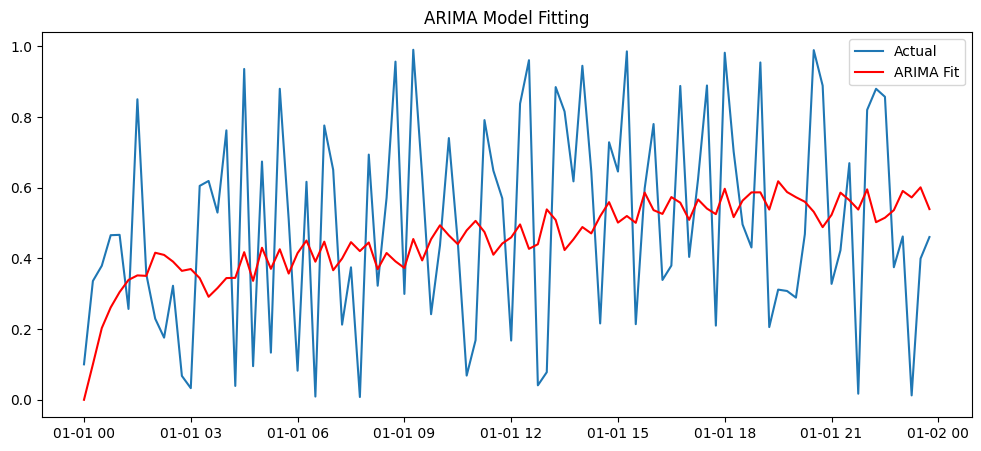

Evaluation Metrics:
MAE  (Mean Absolute Error)        : 0.2614
MSE  (Mean Squared Error)         : 0.0873
RMSE (Root Mean Squared Error)    : 0.2955
MAPE (Mean Absolute Percentage Error) : 275.94%
R² Score                         : -0.0081


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


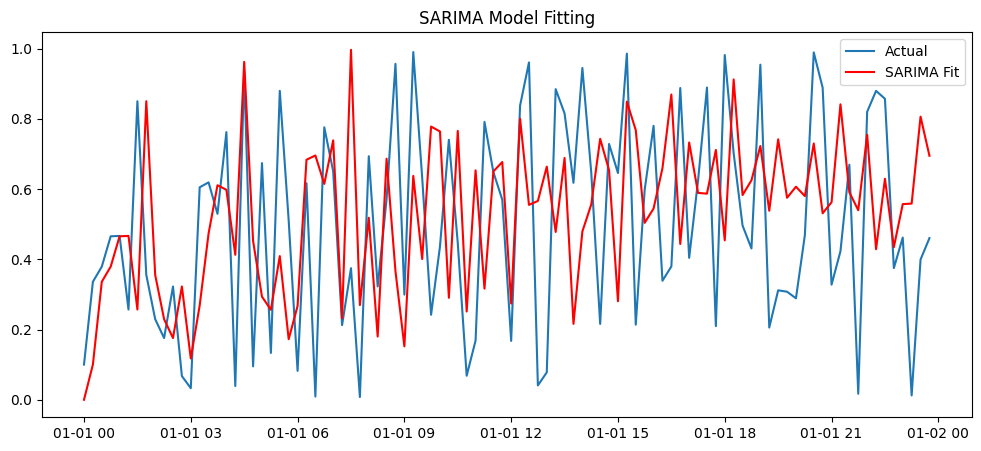

Evaluation Metrics:
MAE  (Mean Absolute Error)        : 0.2728
MSE  (Mean Squared Error)         : 0.1056
RMSE (Root Mean Squared Error)    : 0.3250
MAPE (Mean Absolute Percentage Error) : 290.80%
R² Score                         : -0.2194


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    r2 = r2_score(actual, predicted)

    print(f"Evaluation Metrics:")
    print(f"MAE  (Mean Absolute Error)        : {mae:.4f}")
    print(f"MSE  (Mean Squared Error)         : {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error)    : {rmse:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error) : {mape:.2f}%")
    print(f"R² Score                         : {r2:.4f}")

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

def apply_arima(ts, order=(1,1,1)):
    model = ARIMA(ts, order=order)
    arima_result = model.fit()

    plt.figure(figsize=(12,5))
    plt.plot(ts, label='Actual')
    plt.plot(arima_result.fittedvalues, label='ARIMA Fit', color='red')
    plt.legend()
    plt.title('ARIMA Model Fitting')
    plt.show()

    evaluate_model(ts.dropna(), arima_result.fittedvalues.dropna())

    return arima_result

def apply_sarima(ts, order=(1,1,1), seasonal_order=(1,1,1,12)):
    model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
    sarima_result = model.fit()

    plt.figure(figsize=(12,5))
    plt.plot(ts, label='Actual')
    plt.plot(sarima_result.fittedvalues, label='SARIMA Fit', color='red')
    plt.legend()
    plt.title('SARIMA Model Fitting')
    plt.show()

    evaluate_model(ts.dropna(), sarima_result.fittedvalues.dropna())

    return sarima_result

arima_model = apply_arima(minute_stats['mean'], order=(1,1,1))
sarima_model = apply_sarima(minute_stats['mean'], order=(1,1,1), seasonal_order=(1,1,1,12))


<ipython-input-41-1a757f315cab>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=minute_stats.index[-1], periods=steps+1, freq='T')[1:]


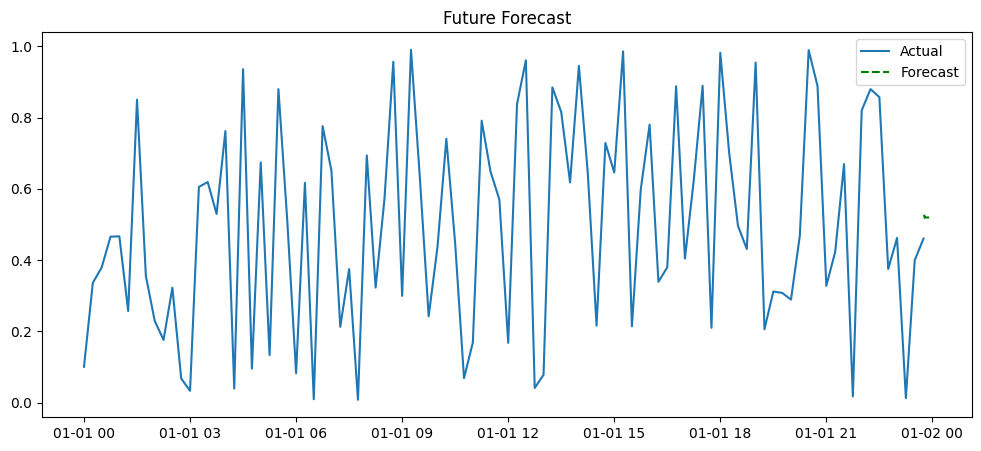

Evaluation Metrics:
MAE  (Mean Absolute Error)        : 0.2530
MSE  (Mean Squared Error)         : 0.0905
RMSE (Root Mean Squared Error)    : 0.3008
MAPE (Mean Absolute Percentage Error) : nan%
R² Score                         : -0.0028


<ipython-input-41-1a757f315cab>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=minute_stats.index[-1], periods=steps+1, freq='T')[1:]


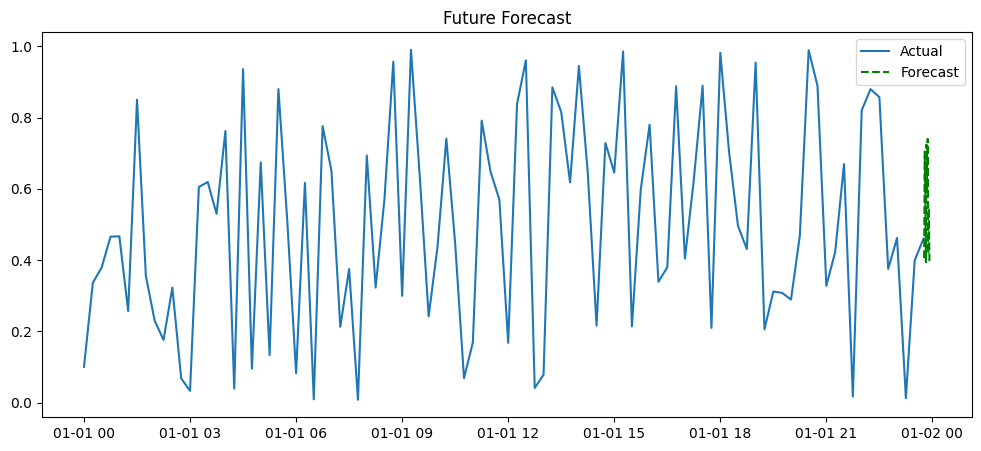

Evaluation Metrics:
MAE  (Mean Absolute Error)        : 0.2905
MSE  (Mean Squared Error)         : 0.1160
RMSE (Root Mean Squared Error)    : 0.3406
MAPE (Mean Absolute Percentage Error) : nan%
R² Score                         : -0.2851


In [ ]:
def forecast_and_evaluate(model, steps=10):
    forecast = model.forecast(steps=steps)
    future_dates = pd.date_range(start=minute_stats.index[-1], periods=steps+1, freq='T')[1:]
    actual_future_values = minute_stats['mean'][-steps:]

    plt.figure(figsize=(12,5))
    plt.plot(minute_stats.index, minute_stats['mean'], label='Actual')
    plt.plot(future_dates, forecast, label='Forecast', color='green', linestyle='dashed')
    plt.legend()
    plt.title('Future Forecast')
    plt.show()

    if len(actual_future_values) == steps:
        evaluate_model(actual_future_values, forecast)

forecast_and_evaluate(arima_model, steps=10)
forecast_and_evaluate(sarima_model, steps=10)


Peak hour: 22:00 with Grid Stability Score: 0.73


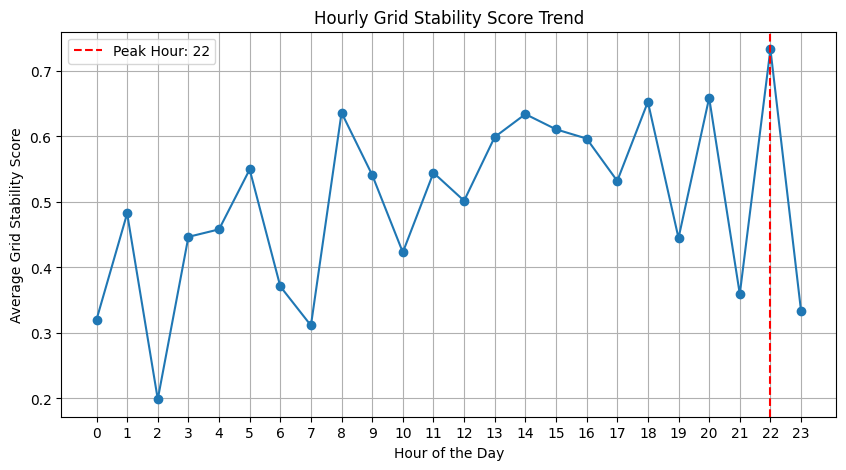

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Hour'] = df['timestamp'].dt.hour
hourly_stats = df.groupby('Hour')['grid_stability_score'].mean()

peak_hour = hourly_stats.idxmax()
peak_value = hourly_stats.max()

print(f"Peak hour: {peak_hour}:00 with Grid Stability Score: {peak_value:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(hourly_stats.index, hourly_stats.values, marker='o', linestyle='-')
plt.axvline(peak_hour, color='red', linestyle='dashed', label=f'Peak Hour: {peak_hour}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Grid Stability Score')
plt.title('Hourly Grid Stability Score Trend')
plt.legend()
plt.xticks(range(0, 24))
plt.grid()
plt.show()


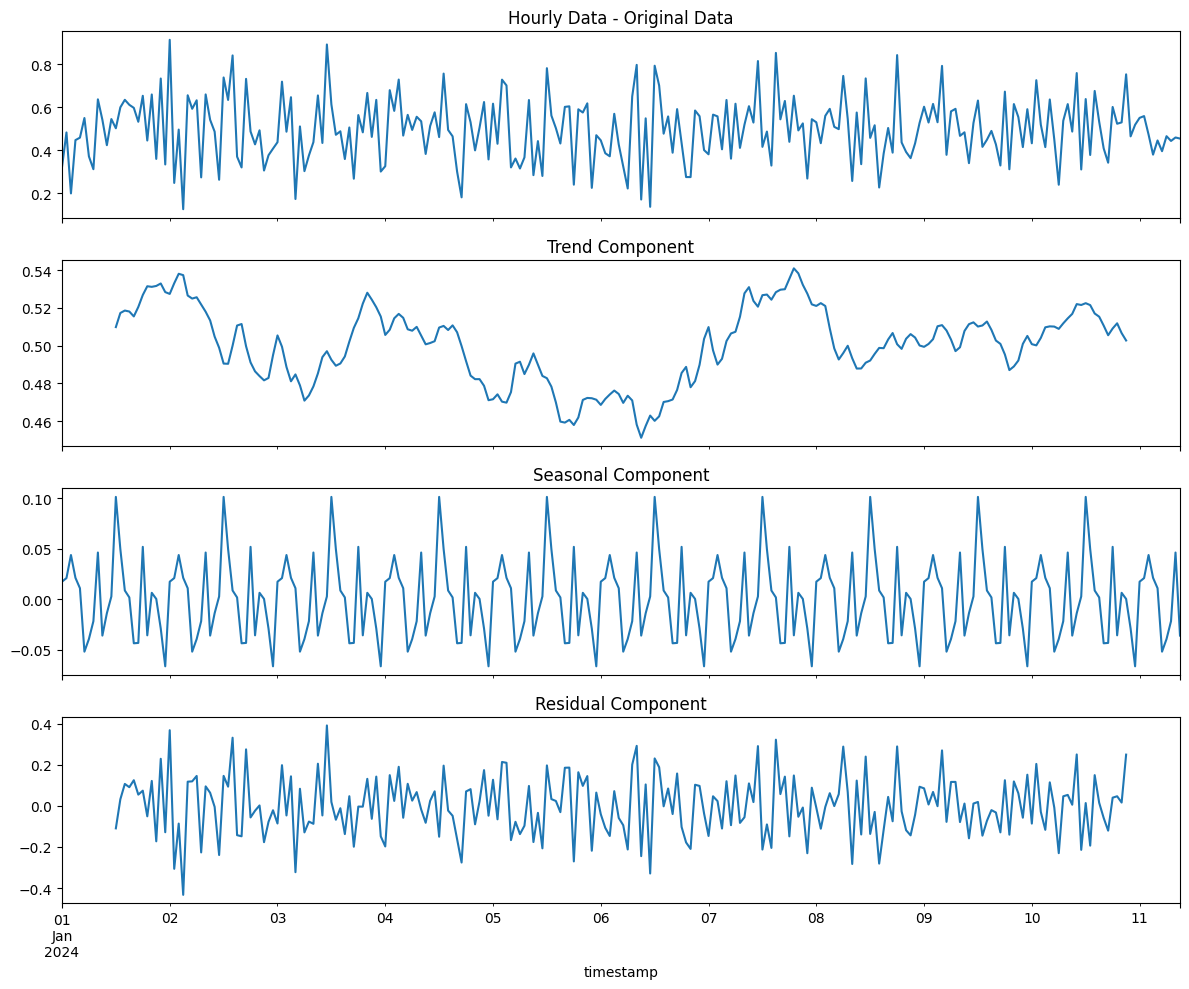

❌ Not enough data for decomposition. Need at least 14 observations, but only 11 available.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load dataset (Replace with actual filename)
df = pd.read_csv('/content/EV_Charging_Grid_Optimization_Categorical.csv')

# Ensure timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# ------- Hourly Aggregation -------
df_hourly = df['grid_stability_score'].resample('h').mean()  # 'h' replaces deprecated 'H'

# ------- Daily Aggregation -------
df_daily = df['grid_stability_score'].resample('D').mean()  # 'D' for daily resampling

# Function to perform decomposition
def decompose_time_series(ts_data, period, title):
    """
    Decomposes the time series into trend, seasonal, and residual components.

    Args:
    ts_data (pd.Series): Time series data
    period (int): Seasonal period
    title (str): Title for the plots
    """
    if len(ts_data) < 2 * period:
        print(f"❌ Not enough data for decomposition. Need at least {2 * period} observations, but only {len(ts_data)} available.")
        return

    # Perform decomposition
    decomposition = sm.tsa.seasonal_decompose(ts_data, model='additive', period=period)

    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

    ts_data.plot(ax=axes[0], title=f'{title} - Original Data')
    decomposition.trend.plot(ax=axes[1], title='Trend Component')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component')
    decomposition.resid.plot(ax=axes[3], title='Residual Component')

    plt.tight_layout()
    plt.show()

# Apply decomposition for hourly data (Assuming daily seasonality with 24 hours cycle)
decompose_time_series(df_hourly, period=24, title='Hourly Data')

# Apply decomposition for daily data (Assuming weekly seasonality with 7-day cycle)
decompose_time_series(df_daily, period=7, title='Daily Data')
